# **Author**: Sarah Mahdi

# **Project Overview and Hypothesis**

- **Problem Statement:** This project investigates New Year resolutions by analyzing Twitter data to explore the top 10 most retweeted resolutions and identify the state with the highest number of tweets about New Year resolutions.

- **Hypothesis:** Resolutions related to personal growth are more likely to be popular and widely shared on social media compared to other types of resolutions. This may be due to their broad appeal and the motivational nature of personal growth, which resonates with many individuals and encourages sharing and engagement.


# **First Look at the Data**

In [ ]:
import pandas as pd
from IPython.display import display


# Mount Google Drive (if necessary)
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file
file_path = '/content/drive/MyDrive/NewYear_Resolutions.csv'
df = pd.read_csv('/content/drive/MyDrive/NewYear_Resolutions.csv')

# Display the DataFrame using IPython display (for HTML format)
display(df.head(10))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state
0,5.500000e+17,Dena_Marina,female,Health & Fitness,"#NewYearsResolution :: Read more books, No scr...",0.0,12/31/14 10:48,CA
1,5.500000e+17,ninjagirl325,female,Humor,#NewYearsResolution Finally master @ZJ10 's pa...,1.0,12/31/14 10:47,NJ
2,5.500000e+17,RickyDelReyy,male,Personal Growth,#NewYearsResolution to stop being so damn perf...,0.0,12/31/14 10:46,CA
3,5.500000e+17,CalmareNJ,male,Philanthropic,My #NewYearsResolution is to help my disabled ...,0.0,12/31/14 10:45,NY
4,5.500000e+17,welovatoyoudemi,female,Personal Growth,#NewYearsResolution #2015Goals #2015bucketlist...,0.0,12/31/14 10:44,PA
5,5.500000e+17,EthanJMoroles,male,Health & Fitness,#NewYearsResolution 1. Eat less.\n2.quit lying.,0.0,12/31/14 10:43,TX
6,5.500000e+17,jon__bay,male,Recreation & Leisure,My #NewYearsResolution \n\n-Learn how to drive...,0.0,12/31/14 10:42,CA
7,5.500000e+17,freckleface_kev,male,Humor,���@Becca3129 #NewYearsResolution #ForReal #Th...,0.0,12/31/14 10:41,NC
8,5.500000e+17,yourethe1zforme,male,Philanthropic,Save a pit bulls life #NewYearsResolution,0.0,12/31/14 10:41,NC
9,5.500000e+17,Dandridge9,male,Humor,RT @_Dear_Leader_: #NewYearsResolution - I wil...,3.0,12/31/14 10:40,OR


# **Data Description**

- I'm planning to analyze patterns in New Year's resolutions based on social media data (Twitter)

-  I have a dataset sourced from Kaggle, which includes a variety of resolutions posted on Twitter around the New Year.

- The dataset comprises data from over 5000 tweets, encapsulating diverse resolutions across several categories such as Health & Fitness, Personal Growth, and Humor.

- This dataset provides eight different characteristics for each resolution tweet, including the tweet ID, user's name, gender, the category of resolution, the text of the tweet, retweet count, tweet creation date, and the state from which the tweet was posted.

- The retweet_count field look like it has missing values, indicating that some tweets' popularity metrics are incomplete. Also, (text field) is varied and unstructured, requiring cleaning and standardization to facilitate text analysis. This includes handling hashtags, mentions, and URLs within the tweets.

# **Data dictionary**

**1- Purpose:**

- The data dictionary provides a comprehensive overview of the dataset, including details about each column's meaning, data type, possible values, and constraints. It serves as a reference guide for understanding the structure and content of the dataset.

**2- Columns:**

* **tweet_id**: Identifier for each tweet.
   - Data Type: float64


* **name**: Unique username of the person who posted the tweet.
    - Data Type: object


* **gender**: Gender of the user who posted the tweet.
    - Data Type: object

* **Resolution_Category**: Category of the New Year's resolution.
    - Data Type: object

* **text**: Content of the tweet.
    - Data Type: object

* **retweet_count**: Number of times the tweet has been retweeted.
    - Data Type: float64


* **tweet_created**: Date and time when the tweet was created.
    - Data Type: object


* **tweet_state**: U.S. state from which the tweet was posted.
    - Data Type: object

**3- Usage:**

- The data dictionary aids in data cleaning, analysis, and visualization by providing clarity on the dataset's structure and constraints. It helps ensure consistent and accurate interpretation of the data.

**4- Documentation:**

- By documenting the data types, descriptions, possible values, and constraints, the data dictionary enhances transparency and usability of the dataset for any stakeholders, analysts, or developers working with the data.




In [ ]:
from tabulate import tabulate


# Define a function to create a data dictionary
def create_data_dictionary(df):
    descriptions = {
        'tweet_id': 'Identifier for each tweet.',
        'name': 'Unique username of the person who posted the tweet.',
        'gender': 'Gender of the user who posted the tweet.',
        'Resolution_Category': 'Category of the New Year\'s resolution.',
        'text': 'Content of the tweet.',
        'retweet_count': 'Number of times the tweet has been retweeted.',
        'tweet_created': 'Date and time when the tweet was created.',
        'tweet_state': 'U.S. state from which the tweet was posted.'
    }

    constraints = {
        'tweet_id': 'No specific constraint.',
        'name': 'Must be unique.',
        'gender': 'Must be one of \'male\', \'female\', or \'other\'.',
        'Resolution_Category': 'No specific constraint.',
        'text': 'No specific constraint.',
        'retweet_count': 'Must be a non-negative integer.',
        'tweet_created': 'Must be a valid date and time.',
        'tweet_state': 'Must be a valid U.S. state code.'
    }

    data_dict = []
    for col in df.columns:
        col_info = {}
        col_info['Column Name'] = col
        col_info['Data Type'] = df[col].dtype
        col_info['Description'] = descriptions.get(col, 'TBD')
        if df[col].dtype == 'object':
            col_info['Possible Values / Units'] = df[col].unique()
        elif col == 'retweet_count':
            col_info['Possible Values / Units'] = '0 and above'
        else:
            col_info['Possible Values / Units'] = 'N/A'
        col_info['Constraints'] = constraints.get(col, 'None')
        data_dict.append(col_info)
    return pd.DataFrame(data_dict)

# Create the data dictionary
data_dict_df = create_data_dictionary(df)

# Display the data dictionary using tabulate with lines separating them
print(tabulate(data_dict_df, headers='keys', tablefmt='grid'))




+----+-----------------------+-------------+-----------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------+
|    | Column Name           | Data Type   | Description                                         | Possible Values / Units                                                                                                                                | Constraints                                  |
+====+=======================+=============+=====================================================+========================================================================================================================================================+==============================================+
|  0 | tweet_id              | float64     | Identifier for each tweet.                          | N/A 

# **Data Processing Steps:**


## **1. Data Cleaning:**

To ensure the quality and consistency of the dataset, the following data cleaning steps were performed:

- **Handling Missing Values:** Rows with missing values in retweet_count column will be converted to Nan value to maintain the integrity of the analysis.
- **Removing Duplicates:** Duplicate rows if found, it will be removed to avoid redundancy and ensure unique data entries.
- **Correcting Errors:** The tweet_created column was converted to datetime format for accurate date and time analysis. Also, it will be in Ascending order.
- **Transforming Data:** The text column was converted to lowercase to standardize the text data and facilitate consistent analysis. However; decided to keep the mention @ in case someone trying to reach a specific person.

## **2. Data Filtering and Displaying for Each State:**

- **Filtering by State:** Filters the dataset to include only tweets from each state.
- **Truncating Text:** Limits the text length to 100 characters for display purposes.
- **Generating HTML Table:** Creates an HTML table with enhanced styling using tabulate.
- **Displaying and Saving:** Displays the HTML table and saves the filtered data to a CSV file for each state.

## **3. Grouping and Aggregation:**

The data was grouped and aggregated to identify key patterns and insights:

- **Grouping by States:** The number of tweets from each state was counted to determine the regional distribution of New Year resolutions.
- **Grouping by Gender:** The tweets were grouped by gender to analyze gender-based differences in resolutions.
- **Grouping by Resolution Category:** The tweets were grouped by resolution categories to understand which types of resolutions were most popular.

## **4. Data Filtering by Clean Text:**

To focus on specific content within the tweets, data filtering was performed:

- **Filtering Clean Text:** Tweets were filtered to include only clean text, removing any extraneous characters and ensuring that the analysis focused on meaningful content.

## **5. Data Filtering to Include Hashtags, Mentions, and URLs:**

Further filtering was done to include tweets with specific features:

- **Filtering Text with Hashtags, Mentions, and URLs:** Tweets containing hashtags, mentions, and URLs were identified to analyze how these elements might influence engagement and popularity.


# **Exploratory Data Analysis (EDA)**


## **1. Visualizing Null Values:**

- **Bar chart of Null Values:** A bar chart was created to visualize the presence of null values across different columns in the dataset.

## **2. Analyzing Tweets by State:**

- **Regional Distribution of Tweets:** The number of tweets from each state was visualized to understand regional differences in New Year resolutions.
- **Top State Analysis:** Identified and visualized the state with the highest number of tweets.

## **3. Analyzing Tweets by Gender:**

- **Gender Distribution of Tweets:** The number of tweets by gender was visualized to analyze gender-based differences in resolutions.

## **4. Analyzing Resolution Categories:**

- **Popularity of Resolution Categories:** The distribution of tweets across different resolution categories was visualized to identify the most popular types of resolutions.
- **Top Resolution Category:** Identified and visualized the most popular resolution category.

## **5. Top Retweeted Tweets Analysis:**

The top 10 most retweeted tweets were identified to understand which resolutions garnered the most attention and engagement:

- **Overall Top Retweeted Tweets:** The top 10 most retweeted tweets were identified to highlight the most popular tweets by resolutions category on Twitter.

- **Total Number of Tweets by State:** The top 10 states with the highest number of tweets were identified to understand regional variations in engagement.

- **Top Retweeted Tweets by Gender:** The genders associated with the top 100 most retweeted tweets were analyzed to identify any gender-based patterns in popular resolutions.


# Checking for Null values

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


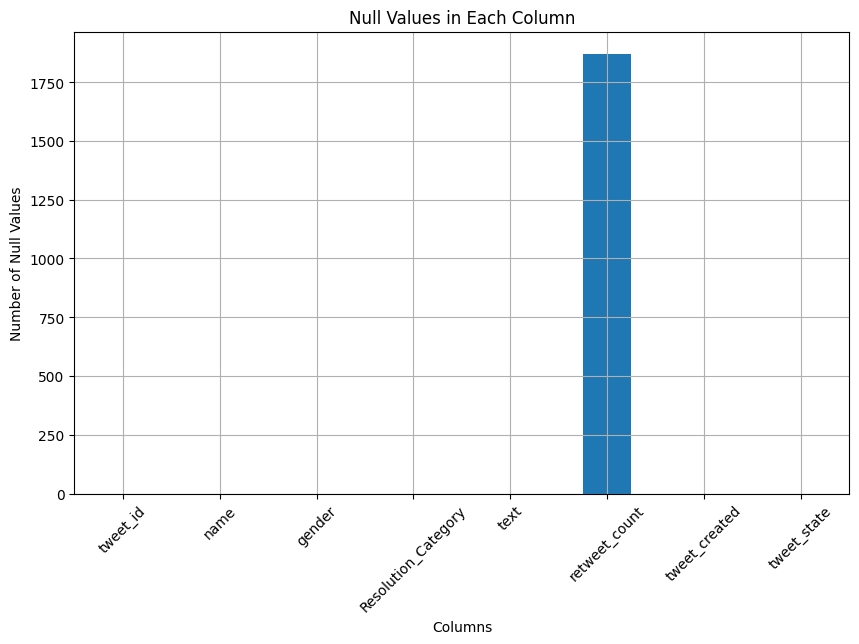


--- Rows with Null Values ---
          tweet_id             name  gender   Resolution_Category  \
3139  5.470000e+17           _K_E_V    male       Personal Growth   
3140  5.470000e+17  BusinessManFlow    male       Personal Growth   
3141  5.470000e+17    allisonbadely  female       Personal Growth   
3142  5.470000e+17      SolesB4uHos    male       Personal Growth   
3143  5.470000e+17          BDonn23    male       Personal Growth   
...            ...              ...     ...                   ...   
5006  5.500000e+17      MarthaH1224  female  Recreation & Leisure   
5007  5.500000e+17      rositajones  female                 Humor   
5008  5.500000e+17   mylifeisdelish  female                 Humor   
5009  5.500000e+17      itsmeJajael  female                Career   
5010  5.500000e+17     _LeahHarrell  female      Health & Fitness   

                                                   text  retweet_count  \
3139  Self improvement!.. Mentally, physically, and ...           

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive (if necessary)
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file
file_path = '/content/drive/MyDrive/NewYear_Resolutions.csv'
df = pd.read_csv(file_path)

# Ensure df is a DataFrame
if isinstance(df, pd.DataFrame):
    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Check for null values in each column
    null_summary = df.isnull().sum()

    # Plotting the null values
    plt.figure(figsize=(10, 6))
    null_summary.plot(kind='bar')
    plt.title('Null Values in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Null Values')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Get a detailed view of rows with null values
    rows_with_nulls = df[df.isnull().any(axis=1)]
    print("\n--- Rows with Null Values ---")
    print(rows_with_nulls)

    # Additional check to print DataFrame info
    print("\n--- DataFrame Info ---")
    print(df.info())
else:
    print("Error: df is not a DataFrame")



The findings are :
- Out of 5011 rows, 1872 rows have null values in the retweet_count column.
- The other columns do not have any null values.

# Group by State

Number of unique states: 51


<ipython-input-19-e6cd0da0fc0a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


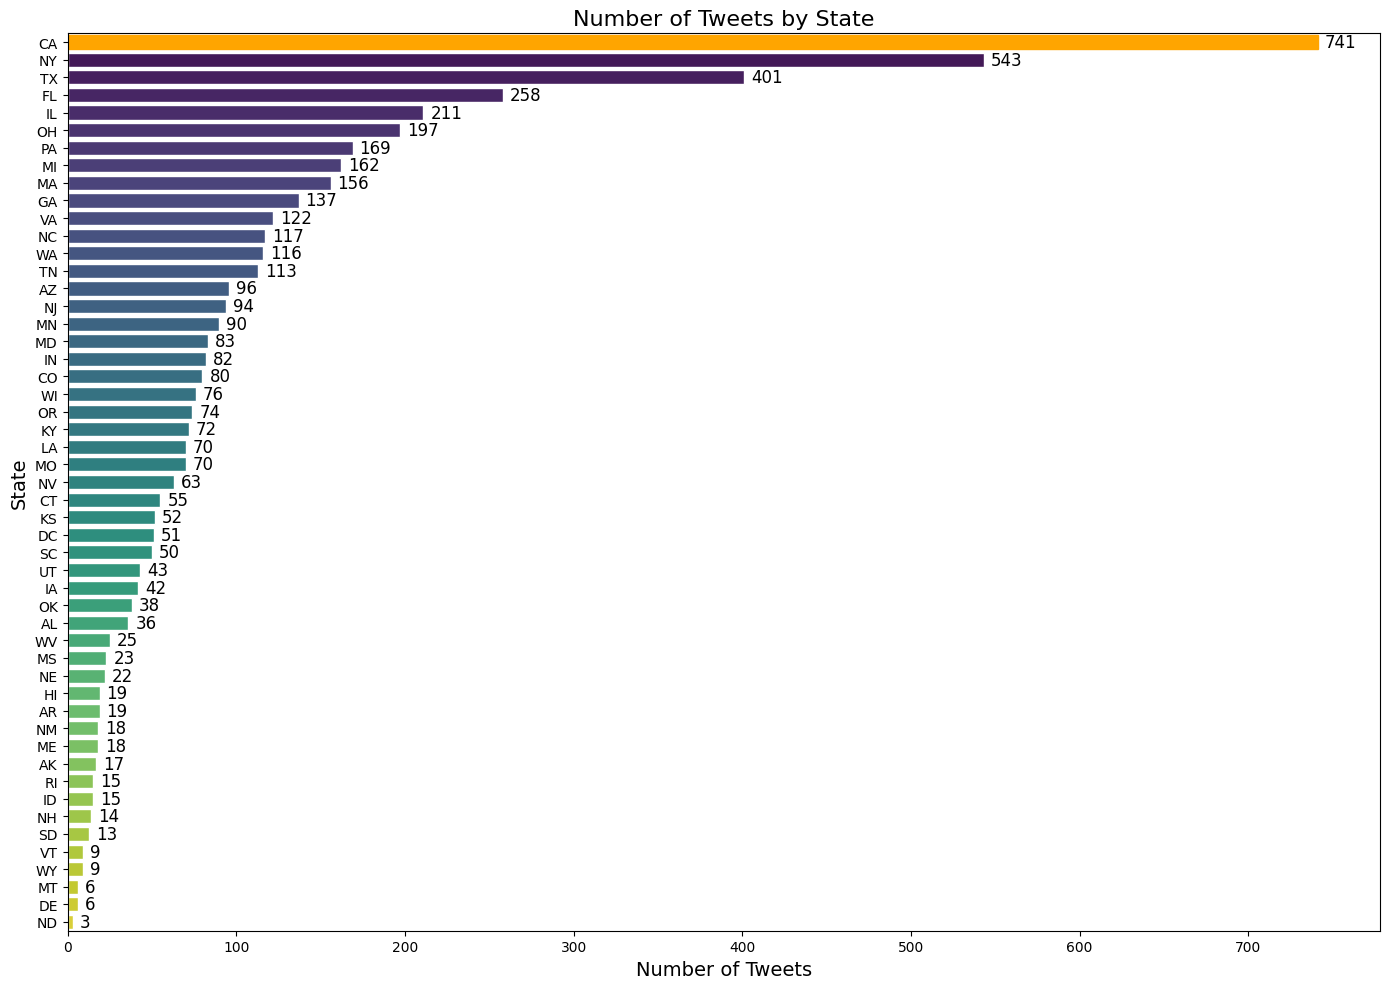

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df is a DataFrame
if isinstance(df, pd.DataFrame):
    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Count the number of unique states
    num_states = df['tweet_state'].nunique()
    print(f"Number of unique states: {num_states}")

    # Group by 'tweet_state' and count the number of tweets per state
    tweets_by_state = df.groupby('tweet_state').size().reset_index(name='tweet_count')

    # Sort the states by tweet count in descending order
    sorted_tweets_by_state = tweets_by_state.sort_values(by='tweet_count', ascending=False)

    # Set up the plot
    plt.figure(figsize=(14, 10))
    barplot = sns.barplot(
        x='tweet_count',
        y='tweet_state',
        data=sorted_tweets_by_state,
        palette='viridis',
        edgecolor='w'
    )

    # Highlight CA
    for idx, bar in enumerate(barplot.patches):
        if sorted_tweets_by_state.iloc[idx]['tweet_state'] == 'CA':
            bar.set_color('orange')

    # Customize the plot
    plt.title('Number of Tweets by State', fontsize=16)
    plt.xlabel('Number of Tweets', fontsize=14)
    plt.ylabel('State', fontsize=14)

    # Annotate bars with the tweet count
    for bar in barplot.patches:
        plt.annotate(
            format(int(bar.get_width()), ','),
            (bar.get_width(), bar.get_y() + bar.get_height() / 2),
            ha='left', va='center',
            xytext=(5, 0), textcoords='offset points',
            fontsize=12
        )

    plt.tight_layout()
    plt.show()
else:
    print("Error: df is not a DataFrame")



- We have 51 states and the findings show CA is the state that has the highest tweets with 741 tweets

# Group by Gender

<ipython-input-17-9db519d5b518>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


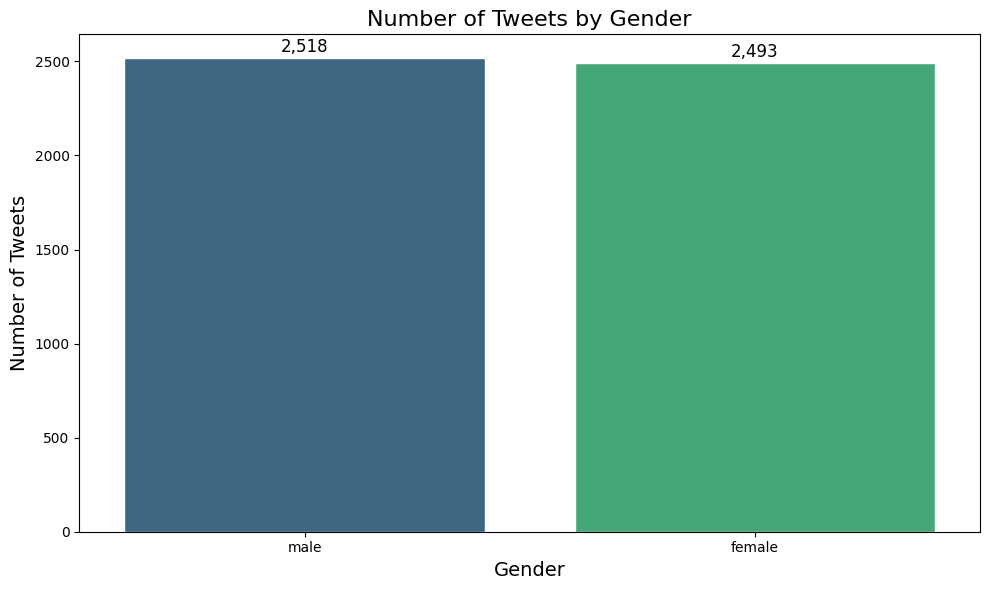

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
prod = pd.read_csv('/content/drive/MyDrive/NewYear_Resolutions.csv')


# Ensure prod is a DataFrame
if isinstance(prod, pd.DataFrame):
    # Remove duplicates
    prod.drop_duplicates(inplace=True)

    # Group by 'gender' and count the number of tweets per gender
    tweets_by_gender = prod.groupby('gender').size().reset_index(name='tweet_count')

    # Sort the genders by tweet count in descending order
    sorted_tweets_by_gender = tweets_by_gender.sort_values(by='tweet_count', ascending=False)

    # Set up the plot
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(
        x='gender',
        y='tweet_count',
        data=sorted_tweets_by_gender,
        palette='viridis',
        edgecolor='w'
    )

    # Customize the plot
    plt.title('Number of Tweets by Gender', fontsize=16)
    plt.xlabel('Gender', fontsize=14)
    plt.ylabel('Number of Tweets', fontsize=14)

    # Annotate bars with the tweet count
    for bar in barplot.patches:
        plt.annotate(
            format(int(bar.get_height()), ','),
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),
            ha='center', va='center',
            xytext=(0, 8), textcoords='offset points',
            fontsize=12
        )

    plt.tight_layout()
    plt.show()
else:
    print("Error: prod is not a DataFrame")


- The findings are Males has tweeted more than females with 2,518 tweets

# Group by Resolution


--- Most Popular Resolution Category ---
Category: Personal Growth, Number of Tweets: 1781


<ipython-input-36-4dd8a23fa2c2>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


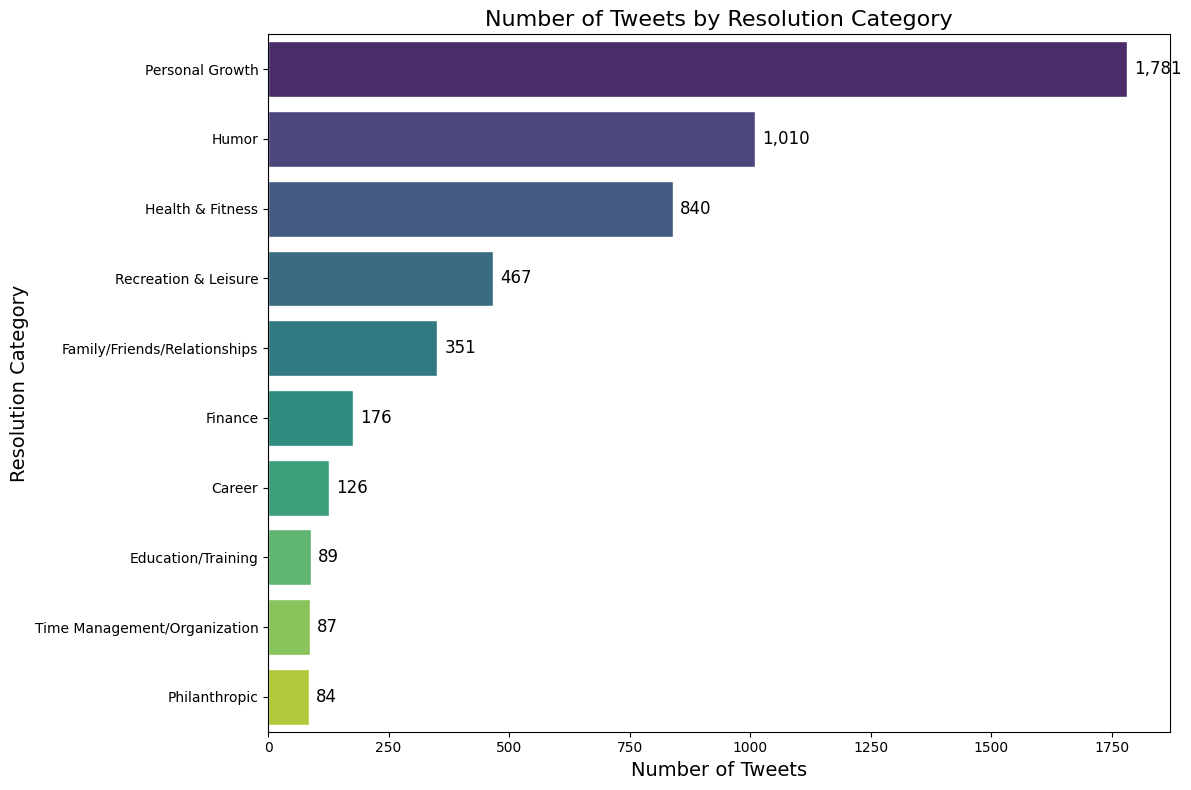

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Ensure prod is a DataFrame
if isinstance(prod, pd.DataFrame):
    # Remove duplicates
    prod.drop_duplicates(inplace=True)

    # Group by 'Resolution_Category' and count the number of tweets per category
    resolutions_by_category = prod.groupby('Resolution_Category').size().reset_index(name='tweet_count')

    # Sort the categories by tweet count in descending order
    sorted_resolutions_by_category = resolutions_by_category.sort_values(by='tweet_count', ascending=False)

    # Find the most popular resolution category
    top_resolution_category = sorted_resolutions_by_category.iloc[0]
    print("\n--- Most Popular Resolution Category ---")
    print(f"Category: {top_resolution_category['Resolution_Category']}, Number of Tweets: {top_resolution_category['tweet_count']}")

    # Set up the plot
    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(
        x='tweet_count',
        y='Resolution_Category',
        data=sorted_resolutions_by_category,
        palette='viridis',
        edgecolor='w'
    )

    # Customize the plot
    plt.title('Number of Tweets by Resolution Category', fontsize=16)
    plt.xlabel('Number of Tweets', fontsize=14)
    plt.ylabel('Resolution Category', fontsize=14)

    # Annotate bars with the tweet count
    for bar in barplot.patches:
        plt.annotate(
            format(int(bar.get_width()), ','),
            (bar.get_width(), bar.get_y() + bar.get_height() / 2),
            ha='left', va='center',
            xytext=(5, 0), textcoords='offset points',
            fontsize=12
        )

    plt.tight_layout()
    plt.show()
else:
    print("Error: prod is not a DataFrame")


- The findings are personal growth is the most popular resolution with 1781 tweets


# Most popular Retweeted Tweets

Most Retweeted Tweet:
RT @TweetLikeAGirI: my only New Years resolution is to not spend money on food I honestly might be rich by 2016
Retweets: 4234.0
State: TX
Gender: female
Resolution Category: Finance


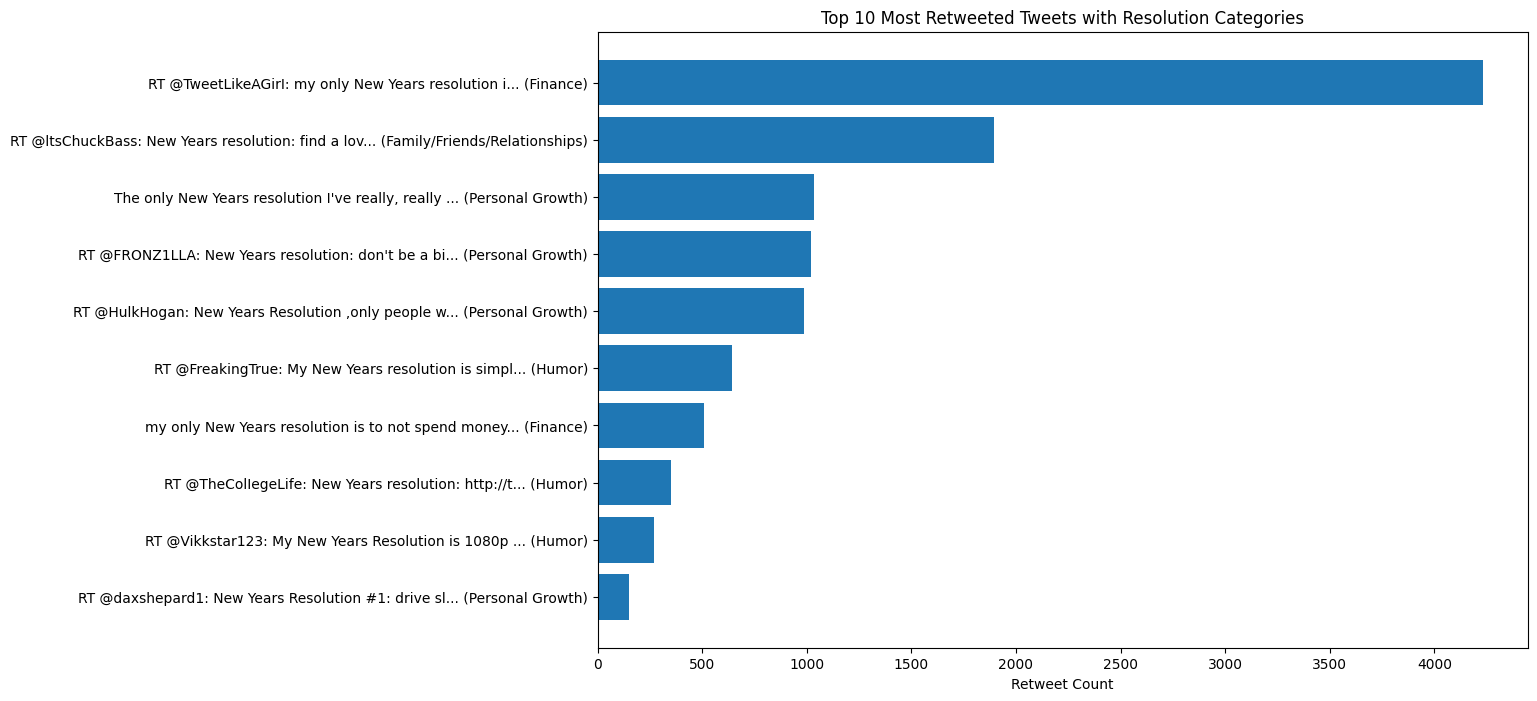

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def remove_duplicates(dataframe):
    return dataframe.drop_duplicates()

def find_most_retweeted(dataframe):
    most_retweeted_tweet = dataframe.loc[dataframe['retweet_count'].idxmax()]
    return most_retweeted_tweet

def plot_top_retweeted_tweets(dataframe):
    top_retweeted_tweets = dataframe.sort_values(by='retweet_count', ascending=False).head(10)
    top_retweeted_tweets['label'] = top_retweeted_tweets.apply(lambda x: f"{x['text'][:50]}... ({x['Resolution_Category']})", axis=1)

    plt.figure(figsize=(12, 8))
    plt.barh(top_retweeted_tweets['label'], top_retweeted_tweets['retweet_count'])
    plt.xlabel('Retweet Count')
    plt.title('Top 10 Most Retweeted Tweets with Resolution Categories')
    plt.gca().invert_yaxis()
    plt.show()

# Ensure df is a DataFrame
if isinstance(df, pd.DataFrame):
    # Remove duplicates
    df = remove_duplicates(df)

    # Find the most retweeted tweet
    most_retweeted_tweet = find_most_retweeted(df)
    resolution_category = most_retweeted_tweet['Resolution_Category']

    print("Most Retweeted Tweet:")
    print(most_retweeted_tweet['text'])
    print("Retweets:", most_retweeted_tweet['retweet_count'])
    print("State:", most_retweeted_tweet['tweet_state'])
    print("Gender:", most_retweeted_tweet['gender'])
    print("Resolution Category:", resolution_category)

    # Plot the top 10 most retweeted tweets
    plot_top_retweeted_tweets(df)


# Top 10 states with the highest number of tweets.

<ipython-input-21-cd05c97810ec>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette='Blues_d')


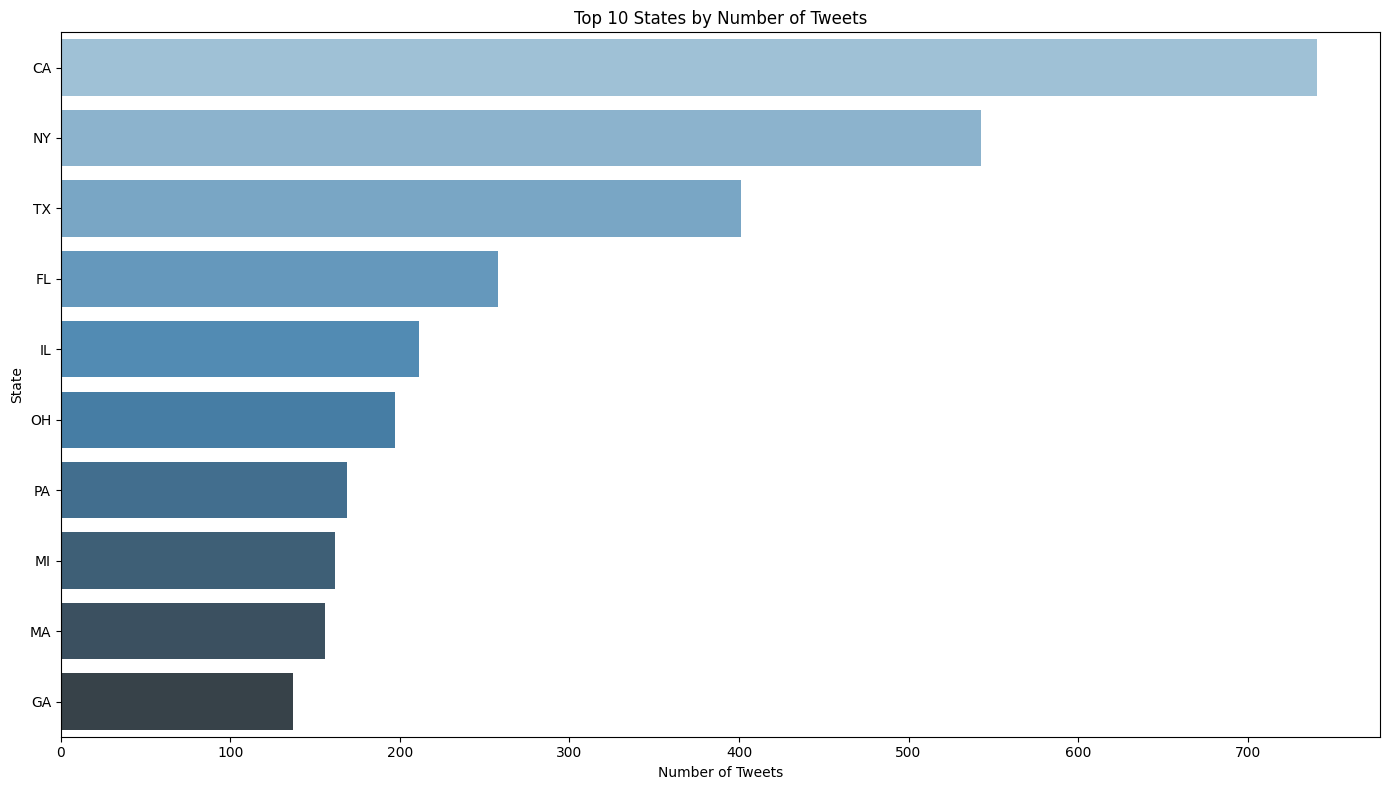

The highest number of tweets is 741 from CA.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def remove_duplicates(dataframe):
    return dataframe.drop_duplicates()

def plot_state_distribution(dataframe, top_n=10):
    plt.figure(figsize=(14, 8))
    top_states = dataframe['tweet_state'].value_counts().head(top_n)
    sns.barplot(x=top_states.values, y=top_states.index, palette='Blues_d')
    plt.title('Top 10 States by Number of Tweets')
    plt.xlabel('Number of Tweets')
    plt.ylabel('State')
    plt.tight_layout()
    plt.show()

    highest_state = top_states.index[0]
    highest_tweet_count = top_states.iloc[0]
    print(f"The highest number of tweets is {highest_tweet_count} from {highest_state}.")

# Ensure df is a DataFrame
if isinstance(df, pd.DataFrame):
    # Remove duplicates
    df = remove_duplicates(df)

    # Plot state distribution of the top tweets
    plot_state_distribution(df, top_n=10)
else:
    print("Error: df is not a DataFrame")



#Top Retweeted Tweets by Gender

<ipython-input-26-ef7c67941691>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='tweet_count', y='gender', data=top_genders, palette='Set2')


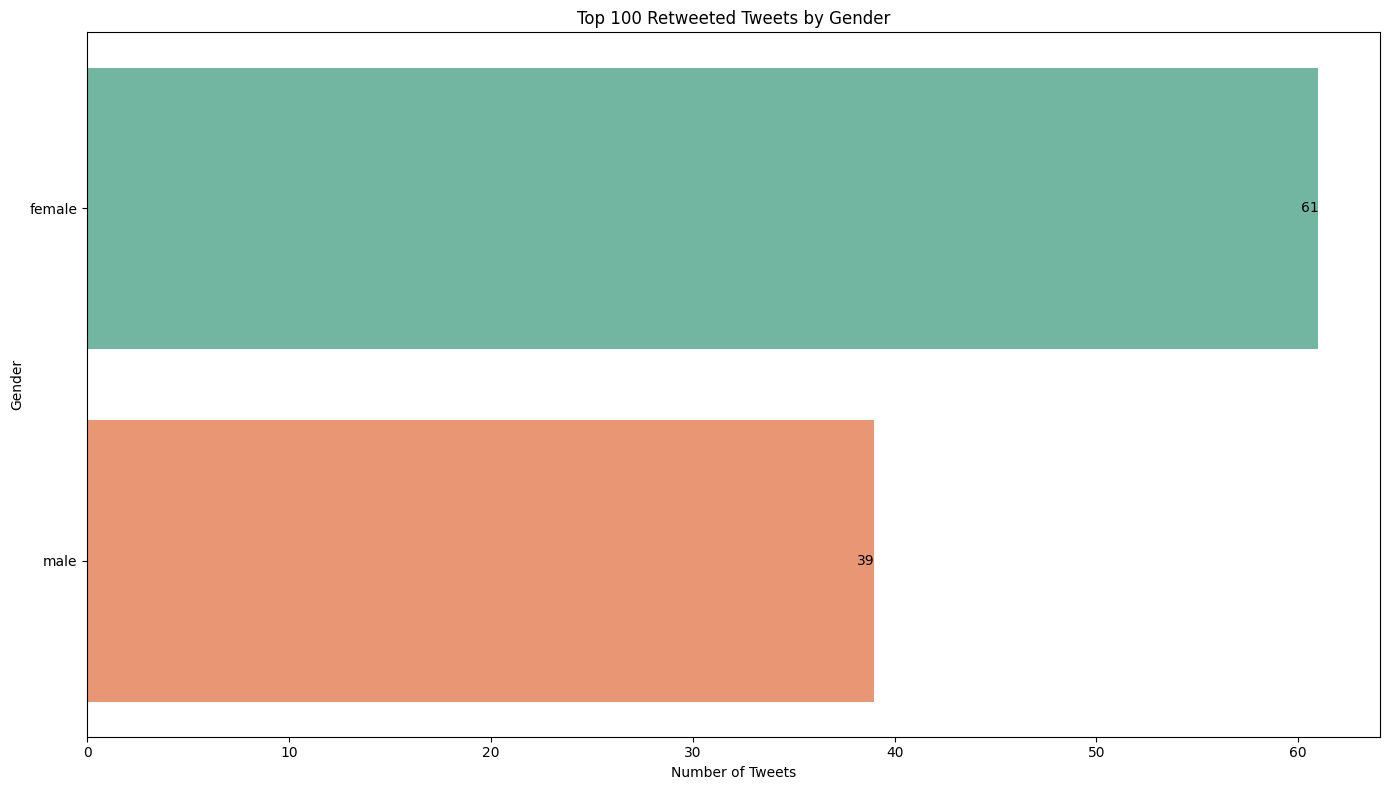

The highest number of top retweeted tweets is 61 from female.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def remove_duplicates(dataframe):
    # Remove duplicate rows from the DataFrame
    return dataframe.drop_duplicates()

def plot_top_retweeted_tweets_by_gender(dataframe, top_n=100):
    # Get the top_n most retweeted tweets
    top_retweeted_tweets = dataframe.sort_values(by='retweet_count', ascending=False).head(top_n)

    # Count the number of tweets for each gender in the top_n tweets
    top_genders = top_retweeted_tweets['gender'].value_counts().reset_index()
    top_genders.columns = ['gender', 'tweet_count']
    top_genders = top_genders.sort_values(by='tweet_count', ascending=False)

    # Plot the bar chart for the gender distribution
    plt.figure(figsize=(14, 8))
    barplot = sns.barplot(x='tweet_count', y='gender', data=top_genders, palette='Set2')

    # Annotate the bar plot with tweet counts
    for index, value in enumerate(top_genders['tweet_count']):
        plt.text(value, index, f'{value}', va='center', ha='right', color='black')

    # Set plot titles and labels
    plt.title(f'Top {top_n} Retweeted Tweets by Gender')
    plt.xlabel('Number of Tweets')
    plt.ylabel('Gender')
    plt.tight_layout()
    plt.show()

    # Get the gender with the highest number of top retweeted tweets
    highest_gender = top_genders['gender'].iloc[0]
    highest_tweet_count = top_genders['tweet_count'].iloc[0]
    print(f"The highest number of top retweeted tweets is {highest_tweet_count} from {highest_gender}.")

# Ensure df is a DataFrame
if isinstance(df, pd.DataFrame):
    # Remove duplicates
    df = remove_duplicates(df)

    # Plot top retweeted tweets by gender
    plot_top_retweeted_tweets_by_gender(df, top_n=100)
else:
    print("Error: df is not a DataFrame")



# Data Filtering
part 1
- Grouping the clean text from each resloution catogery and not displaying anything that has hashtags.

In [ ]:
# Increase the IOPub data rate limit
# from notebook.services.config import ConfigManager

# cm = ConfigManager()
# cm.update('notebook', {
#     'NotebookApp': {
#         'iopub_data_rate_limit': 10000000
#     }
# })


import re
from tabulate import tabulate
from IPython.display import display, HTML


# Define a function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Clean the text in the DataFrame
df['clean_text'] = df['text'].apply(clean_text)

# Group the text by Resolution_Category
grouped_text = df.groupby('Resolution_Category')['clean_text'].apply(lambda texts: ' '.join(texts)).reset_index()

# Truncate the text for display purposes
grouped_text['clean_text'] = grouped_text['clean_text'].apply(lambda x: x[:100] + '...' if len(x) > 100 else x)

# Generate HTML table
html_table = tabulate(grouped_text.head(10), headers='keys', tablefmt='html')

# Add CSS for enhanced coloring of the table
html_table = f"""
<style>
    table {{
        width: 100%;
        border-collapse: collapse;
        font-family: Arial, sans-serif;
    }}
    th {{
        background-color: #ADD8E6;
        color: black;
        font-weight: bold;
        text-align: center;
    }}
    td, th {{
        border: 1px solid #ddd;
        padding: 8px;
    }}
    tr:nth-child(even) {{
        background-color: #f2f2f2;
    }}
    tr:nth-child(odd) {{
        background-color: #ffffff;
    }}
    tr:hover {{
        background-color: #ddd;
    }}
</style>
{html_table}
"""

# Display the colorful HTML table
display(HTML(html_table))

# Save the grouped text to a CSV file
grouped_text.to_csv('/content/drive/MyDrive/grouped_text.csv', index=False)
print("Grouped text saved to '/content/drive/MyDrive/grouped_text.csv'")



,Resolution_Category,clean_text
0,Career,transfer to another college mmt im setting myself or at most goals for yes but with is to...
1,Education/Training,to learn how to play a completely new instrument probably the cello learn guitar and start a youtu...
2,Family/Friends/Relationships,also date women my own age not to say its their fault only a seasoned woman can put up with my idioc...
3,Finance,rt im gonna get rich and be a bitch no more starbucks starting tomorrow too much money spent on va...
4,Health & Fitness,read more books no scrolling fbchecking email b breakfast stay dedicated to ptyoga to squash my ac...
5,Humor,finally master s part of kitchen sink is so true rt i will get a decent haircut this is ...
6,Personal Growth,to stop being so damn perf continued lost a lot this yearno more tears for the next yes le...
7,Philanthropic,my is to help my disabled patients discover the emotional and physical therapy from loving a pet s...
8,Recreation & Leisure,my learn how to drive apologize less read and write more get a this upcoming quarter drop my mix...
9,Time Management/Organization,avoid getting jammed in give my instruments more attention one is better time management with ...


Grouped text saved to '/content/drive/MyDrive/grouped_text.csv'


#Data Filtering
part 2
- Grouping text by hashtags, mentions, URLs, and symbols

In [ ]:
# Increase the IOPub data rate limit
# from notebook.services.config import ConfigManager

# cm = ConfigManager()
# cm.update('notebook', {
#     'NotebookApp': {
#         'iopub_data_rate_limit': 10000000
#     }
# })

from tabulate import tabulate
from IPython.display import display, HTML


# Group the original text by Resolution_Category
grouped_text = df.groupby('Resolution_Category')['text'].apply(lambda texts: ' '.join(texts)).reset_index()

# Truncate the text for display purposes
grouped_text['text'] = grouped_text['text'].apply(lambda x: x[:100] + '...' if len(x) > 100 else x)

# Generate HTML table
html_table = tabulate(grouped_text.head(10), headers='keys', tablefmt='html')

# Add CSS for enhanced coloring of the table
html_table = f"""
<style>
    table {{
        width: 100%;
        border-collapse: collapse;
        font-family: Arial, sans-serif;
    }}
    th {{
        background-color: #ADD8E6;
        color: Black;
        font-weight: bold;
        text-align: center;
    }}
    td, th {{
        border: 1px solid #ddd;
        padding: 8px;
    }}
    tr:nth-child(even) {{
        background-color: #f2f2f2;
    }}
    tr:nth-child(odd) {{
        background-color: #ffffff;
    }}
    tr:hover {{
        background-color: #ddd;
    }}
</style>
{html_table}
"""

# Display the colorful HTML table
display(HTML(html_table))

# Save the grouped text to a CSV file
grouped_text.to_csv('/content/drive/MyDrive/grouped_text.csv', index=False)
print("Grouped text saved to '/content/drive/MyDrive/grouped_text.csv'")


,Resolution_Category,text
0,Career,"#NewYearsResolution Transfer to another College MMT @neilwatkins05 @elledodd: ""I'm setting myself 10..."
1,Education/Training,"#NewYearsResolution To learn how to play a completely new instrument, probably the Cello. #NewYearsR..."
2,Family/Friends/Relationships,"Also, date women my own age. Not to say it's their fault, only a seasoned woman can put up with my i..."
3,Finance,RT @Queen_of_prep: I'm gonna get rich and be a bitch #NewYearsResolution no more starbucks starting ...
4,Health & Fitness,"#NewYearsResolution :: Read more books, No scrolling FB/checking email b4 breakfast, stay dedicated ..."
5,Humor,#NewYearsResolution Finally master @ZJ10 's part of Kitchen Sink ���@Becca3129 #NewYearsResolution #...
6,Personal Growth,#NewYearsResolution to stop being so damn perf _���_��� #NewYearsResolution #2015Goals #2015bucketli...
7,Philanthropic,My #NewYearsResolution is to help my disabled patients discover the emotional and physical therapy f...
8,Recreation & Leisure,My #NewYearsResolution -Learn how to drive. -Apologize less. -Read and write more. -Get a 4.0 this...
9,Time Management/Organization,"""@parksandrecnbc: Avoid getting Jammed in 2015. #NewYearsResolution"" @calmedoctorhuey Give my instru..."


Grouped text saved to '/content/drive/MyDrive/grouped_text.csv'


# Separating each State with its tweets

In [ ]:
# Increase the IOPub data rate limit
# from notebook.services.config import ConfigManager

# cm = ConfigManager()
# cm.update('notebook', {
#     'NotebookApp': {
#         'iopub_data_rate_limit': 10000000
#     }
# })
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from IPython.display import display, HTML
import re


# Initial row count
initial_row_count = df.shape[0]
print(f"Initial row count: {initial_row_count}")

# Convert empty values in 'retweet_count' to NaN
initial_nan_count_retweet = df['retweet_count'].isna().sum()
print(f"Initial empty value count in 'retweet_count': {initial_nan_count_retweet}")

# Data Cleaning Steps
# Convert empty values in 'retweet_count' to NaN
df['retweet_count'] = df['retweet_count'].apply(lambda x: float('nan') if pd.isnull(x) else x)

# Check for NaNs after converting empty values to NaN
nan_count_retweet_after_conversion = df['retweet_count'].isna().sum()
print(f"NaN count in 'retweet_count' after changing it from empty value: {nan_count_retweet_after_conversion}")

# Removing duplicates
before_duplicates_row_count = df.shape[0]
df = df.drop_duplicates()
after_duplicates_row_count = df.shape[0]

# Number of duplicates removed
duplicates_removed = before_duplicates_row_count - after_duplicates_row_count
print(f"Row count after removing duplicates: {after_duplicates_row_count}")
print(f"Number of duplicates removed: {duplicates_removed}")

# Correcting errors (example: fixing date format)
df['tweet_created'] = pd.to_datetime(df['tweet_created'], errors='coerce')

# Function to clean text by removing hashtags, mentions, and URLs, and converting to lowercase
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s@]', '', text)  # Remove special characters except @ for mentions
    text = re.sub(r'_+', ' ', text)  # Remove underscores
    text = text.strip()  # Remove leading and trailing whitespace
    return text

# Apply the cleaning function to create clean_text column
df['clean_text'] = df['text'].apply(clean_text)

# Sorting the DataFrame by the 'tweet_created' column to start from the oldest date and time
df = df.sort_values(by='tweet_created', ascending=True)

# List of states (or you can dynamically get unique states from the dataset)
states = df['tweet_state'].unique()

# Function to display and save tweets from a specific state
def filter_and_display_state_tweets(state):
    # Data Filtering: Filter tweets from the given state
    state_tweets = df[df['tweet_state'] == state].copy()

    # Ensure the text and clean_text are lowercase and truncate for display purposes
    state_tweets.loc[:, 'text'] = state_tweets['text'].apply(lambda x: x[:100] + '...' if len(x) > 100 else x)
    state_tweets.loc[:, 'clean_text'] = state_tweets['clean_text'].apply(lambda x: x[:100] + '...' if len(x) > 100 else x)

    # Generate HTML table
    html_table = tabulate(state_tweets.head(10), headers='keys', tablefmt='html')

    # Add CSS for enhanced coloring of the table
    html_table = f"""
    <style>
        table {{
            width: 100%;
            border-collapse: collapse;
            font-family: Arial, sans-serif;
        }}
        th {{
            background-color: #ADD8E6;
            color: black;
            font-weight: bold;
            text-align: center;
        }}
        td, th {{
            border: 1px solid #ddd;
            padding: 8px;
        }}
        tr:nth-child(even) {{
            background-color: #f2f2f2;
        }}
        tr:nth-child(odd) {{
            background-color: #ffffff;
        }}
        tr:hover {{
            background-color: #ddd;
        }}
    </style>
    {html_table}
    """

    # Display the colorful HTML table
    display(HTML(html_table))

    # Save the filtered tweets to a CSV file
    state_tweets.to_csv(f'/content/drive/MyDrive/{state}_tweets.csv', index=False)
    print(f"Filtered tweets for {state} saved to '/content/drive/MyDrive/{state}_tweets.csv'")

# Apply the function to each state
for state in states:
    filter_and_display_state_tweets(state)


Initial row count: 5011
Initial empty value count in 'retweet_count': 1872
NaN count in 'retweet_count' after changing it from empty value: 1872
Row count after removing duplicates: 5011
Number of duplicates removed: 0


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3559,5.47e+17,IMGAVI,male,Humor,#NewYearsResolution to not put the parking lot ticket directly in my mouth right after getting it fr...,nan,2014-12-21 16:11:00,CA,to not put the parking lot ticket directly in my mouth right after getting it from the machine
3566,5.47e+17,MizzTifferz,female,Health & Fitness,I have to go do my 6 mile run. #stayingFIT #toneUP #StallionBOOTY #NewYearsResolution starts now.,nan,2014-12-21 19:12:00,CA,i have to go do my 6 mile run starts now
3568,5.47e+17,PartiPants27,male,Humor,"My #NewYearsResolution is to gain a bunch of weight, then lose it",nan,2014-12-21 19:46:00,CA,my is to gain a bunch of weight then lose it
3569,5.47e+17,N0NST0P,male,Health & Fitness,"���@PartiPants27: My #NewYearsResolution is to make ""dem gainz"" By any means necessary�۝ bang bang m...",nan,2014-12-21 19:46:00,CA,@partipants27 my is to make dem gainz by any means necessary bang bang muscle gainz
3571,5.47e+17,soapboxdiatribe,male,Humor,#NewYearsResolution 1: Acknowledge life's futility by becoming an alcoholic. (All tips and advice ...,nan,2014-12-21 20:10:00,CA,1 acknowledge lifes futility by becoming an alcoholic all tips and advice are welcome
3578,5.47e+17,JustonBrommel,male,Philanthropic,I Am here to save the world. Damn it feels good. Daily Miracles. Join the #evolution #NewYearsResol...,nan,2014-12-21 22:32:00,CA,i am here to save the world damn it feels good daily miracles join the what are you here 4
3580,5.47e+17,zhcnsile,male,Recreation & Leisure,1. Catch up on the 20 series I've totally missed out on. #NewYearsResolution,nan,2014-12-21 23:22:00,CA,1 catch up on the 20 series ive totally missed out on
3584,5.47e+17,xNova_Cane,female,Family/Friends/Relationships,@adrianna_love oh #NewYearsResolution ? It should be to build a real friendship like you promised w...,nan,2014-12-22 05:20:00,CA,@adrianna love oh it should be to build a real friendship like you promised wed have
3585,5.47e+17,adrianna_love,female,Family/Friends/Relationships,RT @xNova_Cane: @adrianna_love oh #NewYearsResolution ? It should be to build a real friendship lik...,nan,2014-12-22 05:20:00,CA,rt @xnova cane @adrianna love oh it should be to build a real friendship like you promised wed ha...
3590,5.47e+17,keylamarques,female,Recreation & Leisure,#vacation! Ahhhh I can finally relax. Work on my #NewYearsResolution ;),nan,2014-12-22 09:43:00,CA,ahhhh i can finally relax work on my


Filtered tweets for CA saved to '/content/drive/MyDrive/CA_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3560,5.47e+17,RaeShae90,male,Health & Fitness,I got the hair. I just need to work on the body to pull off Lara Croft next Halloween #NewYearsResol...,nan,2014-12-21 16:16:00,TX,i got the hair i just need to work on the body to pull off lara croft next halloween
3572,5.47e+17,Teddy_Retro,male,Philanthropic,"they gotta listen tho ""@K1NG_JAMES_ #NewYearsResolution teach everyone I come in contact with a posi...",nan,2014-12-21 20:37:00,TX,they gotta listen tho @k1ng james teach everyone i come in contact with a positive lesson that hel...
3573,5.47e+17,Ambry_DeLeon,female,Personal Growth,RT @K1NG_JAMES_: I just wanna be as happy as the ppl that be on my chemistry book pretend to be #New...,nan,2014-12-21 20:51:00,TX,rt @k1ng james i just wanna be as happy as the ppl that be on my chemistry book pretend to be
3583,5.47e+17,ianjohndallas,male,Humor,Wow my last post was around this time last year. #NewYearsResolution Get my twitter game up lol,nan,2014-12-22 04:25:00,TX,wow my last post was around this time last year get my twitter game up lol
3593,5.47e+17,CindyyyRella25,female,Recreation & Leisure,2015 lots of traveling ������ #NewYearsResolution,nan,2014-12-22 10:51:00,TX,2015 lots of traveling
3620,5.47e+17,mustache_party,male,Recreation & Leisure,Planning on uploading my entire music catalog on @Spotify and @iTunesMusic in early 2015. #NewYearsR...,nan,2014-12-22 17:56:00,TX,planning on uploading my entire music catalog on @spotify and @itunesmusic in early 2015
3629,5.47e+17,gemaruiz01,female,Family/Friends/Relationships,#NewYearsResolution 1. To become best friends with CAMERON Alexander Dallas _��_��_��� @camerondalla...,nan,2014-12-22 21:25:00,TX,1 to become best friends with cameron alexander dallas @camerondallas
3645,5.47e+17,x_redwine,female,Health & Fitness,"next year, GNC will be the main store i'll be in. i wanna loose 50 pounds._�ջ #NewYearsResolution",nan,2014-12-23 07:05:00,TX,next year gnc will be the main store ill be in i wanna loose 50 pounds ջ
3664,5.47e+17,Dreamescape88,female,Health & Fitness,#NewYearsResolution no more soda,nan,2014-12-23 09:18:00,TX,no more soda
3666,5.47e+17,_Mosby,male,Career,RT @GolTV: Bae: I want a man with a career... I'm on it! #NewYearsResolution http://t.co/yeHkT7ywzJ,nan,2014-12-23 10:38:00,TX,rt @goltv bae i want a man with a career im on it


Filtered tweets for TX saved to '/content/drive/MyDrive/TX_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3139,5.47e+17,_K_E_V,male,Personal Growth,"Self improvement!.. Mentally, physically, and financially. #NewYearsResolution",nan,2014-12-21 16:30:00,NV,self improvement mentally physically and financially
3657,5.47e+17,Aliciabeme,female,Recreation & Leisure,"#ChristmasAlone this year, again. I've decided to work on my #NewYearsResolution, play #DAI and eat ...",nan,2014-12-23 08:24:00,NV,this year again ive decided to work on my play and eat cake and wine
3746,5.48e+17,curtisreames,male,Humor,Day #358 of my #NewYearsResolution to tweet @TheEllenShow daily 4 #ShowTickets and/or #12Days ticket...,nan,2014-12-24 11:59:00,NV,day of my to tweet @theellenshow daily 4 andor tickets
3969,5.49e+17,MarcusSalisbury,male,Personal Growth,Just need to learn to not get my hopes up. #NewYearsResolution,nan,2014-12-27 10:21:00,NV,just need to learn to not get my hopes up
4063,5.49e+17,PaperPadThai,female,Finance,My #NewYearsResolution is to make more money. Thanks to @l00tapp that is possible! http://t.co/C3esQ...,nan,2014-12-27 19:18:00,NV,my is to make more money thanks to @l00tapp that is possible
4103,5.49e+17,whitneysphar,female,Personal Growth,"My only goal in 2015 is to be happy. Genuinely, intensely, consistently, happy. #NewYearsResolution",nan,2014-12-27 22:59:00,NV,my only goal in 2015 is to be happy genuinely intensely consistently happy
3435,5.49e+17,curtisreames,male,Personal Growth,Day #362 @TheEllenShow #NewYearsResolution #ShowTickets #12Days Tweeting daily to get noticed and th...,nan,2014-12-28 13:12:00,NV,day @theellenshow tweeting daily to get noticed and this is my again
4281,5.49e+17,gabyjayyy,female,Personal Growth,"I am not going out of my way for ANYONE anymore fuck that. My motto for 2015 is going to be ""not my ...",nan,2014-12-28 21:19:00,NV,i am not going out of my way for anyone anymore fuck that my motto for 2015 is going to be not my fu...
4355,5.5e+17,RIMerideth,female,Time Management/Organization,This week I will do better at work/life balance! #NewYearsResolution,nan,2014-12-29 07:45:00,NV,this week i will do better at worklife balance
4475,5.5e+17,curtisreames,male,Personal Growth,Day #363 of me tweeting @TheEllenShow daily to fulfill my #2014 #NewYearsResolution for #ShowTickets...,nan,2014-12-29 13:44:00,NV,day of me tweeting @theellenshow daily to fulfill my for andor tickets


Filtered tweets for NV saved to '/content/drive/MyDrive/NV_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3561,5.47e+17,TreyRichardJK,male,Humor,I've decided to get pregnant in #2015 #NewYearsResolution,nan,2014-12-21 17:51:00,FL,ive decided to get pregnant in
3575,5.47e+17,Red_Inspired,male,Health & Fitness,#bucketlist eat at chipotle never had it #1problem #NewYearsResolution is to go vegetarian. Panara i...,nan,2014-12-21 21:09:00,FL,eat at chipotle never had it is to go vegetarian panara it is never had that either
3579,5.47e+17,hscuevas,female,Personal Growth,&amp; too obsessed with social media.... habit I need to break #NewYearsResolution,nan,2014-12-21 22:50:00,FL,amp too obsessed with social media habit i need to break
3352,5.47e+17,FyM_MoTiVe,male,Time Management/Organization,#NewYearsResolution for 2015 is to finish writing my book and get it published,nan,2014-12-22 07:55:00,FL,for 2015 is to finish writing my book and get it published
3354,5.47e+17,Hayesisprf,female,Recreation & Leisure,#NewYearsResolution is for @AaronCarpenter to flipping FOLLOW ME!!!!! #FollowMeAaron,nan,2014-12-22 17:04:00,FL,is for @aaroncarpenter to flipping follow me
3618,5.47e+17,HashtagSupaWolf,male,Personal Growth,When this new year comes I'm going to stick to my #NewYearsResolution,nan,2014-12-22 17:34:00,FL,when this new year comes im going to stick to my
3627,5.47e+17,immersedlaugh,male,Personal Growth,True to my word: I erased the little bits that you said the second you no longer found it convenient...,nan,2014-12-22 21:06:00,FL,true to my word i erased the little bits that you said the second you no longer found it convenient ...
3639,5.47e+17,jackrodgersjr,male,Personal Growth,"My #newyearsresolution: avoid all thoughts of personal reform, self-improvement or plans that lead t...",nan,2014-12-23 04:10:00,FL,my avoid all thoughts of personal reform selfimprovement or plans that lead to guilt denial or othe...
3358,5.47e+17,Ashaunti_Spence,female,Personal Growth,#RP jayraw__ #newyearsresolution _���_���_��� I am emotionally tired of worrying about who is down w...,nan,2014-12-23 08:22:00,FL,jayraw i am emotionally tired of worrying about who is down with me
3670,5.47e+17,JustMeCristian,male,Humor,"2015, i shall get ripped bruhhh _���_��� #relateable #Funny #Comedy #newyearsresolution https://t.co...",nan,2014-12-23 11:41:00,FL,2015 i shall get ripped bruhhh


Filtered tweets for FL saved to '/content/drive/MyDrive/FL_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3562,5.47e+17,kasbury23,female,Personal Growth,All I want for Christmas is to be Carrie Underwood. #NewYearsResolution,nan,2014-12-21 18:09:00,SC,all i want for christmas is to be carrie underwood
3837,5.49e+17,foolingfood,female,Time Management/Organization,@MyNamesChai #NewYearsResolution to finish unfinished projects.,nan,2014-12-26 08:38:00,SC,@mynameschai to finish unfinished projects
3871,5.49e+17,comocean984,female,Health & Fitness,I felt every dollop of gravy #newyearsresolution I just ran 3.01 mi @ a 11'44'' pace with Nike+. ht...,nan,2014-12-26 13:24:00,SC,i felt every dollop of gravy i just ran 301 mi @ a 1144 pace with nike
3416,5.49e+17,KrisCMcCreary,female,Personal Growth,My #newyearsresolution : Be kinder &amp; more understanding. We're all just trying to find our way i...,nan,2014-12-27 19:12:00,SC,my be kinder amp more understanding were all just trying to find our way in this journey of life
4085,5.49e+17,GetMoneyMurdock,male,Health & Fitness,2015 I'm going to be dedicated to the gym _٪�_�ջ_�ջ_���_��� #NewYearsResolution,nan,2014-12-27 21:19:00,SC,2015 im going to be dedicated to the gym ջ ջ
4105,5.49e+17,dcraigsc,male,Finance,My #NewYearsResolution is to make more money. Thanks to @l00tapp that is possible! http://t.co/qZuB7...,nan,2014-12-27 23:14:00,SC,my is to make more money thanks to @l00tapp that is possible
4368,5.5e+17,stephenericward,male,Finance,The moment you stop investing in yourself is the moment you have written off future dividends in lif...,nan,2014-12-29 08:37:00,SC,the moment you stop investing in yourself is the moment you have written off future dividends in lif...
4551,5.5e+17,MajesticBrotha,male,Humor,All of my #NewYearsResolution Tweets are gonna be about Sex. That's the one thing I can commit to fa...,nan,2014-12-29 17:07:00,SC,all of my tweets are gonna be about sex thats the one thing i can commit to faithfully
3292,5.5e+17,Goodwawa,female,Personal Growth,My #NewYearsResolution is to be open to new things. Things I never thought about trying. Beyond the ...,nan,2014-12-29 19:46:00,SC,my is to be open to new things things i never thought about trying beyond the ordinary ϭ
4727,5.5e+17,BrianTuckerSC,male,Humor,My #NewYearsResolution is to be more proficient in my use of #emojis . _ٍ� cheers! #sarcasm #rebel...,nan,2014-12-30 06:47:00,SC,my is to be more proficient in my use of cheers @funnyordie


Filtered tweets for SC saved to '/content/drive/MyDrive/SC_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3563,5.47e+17,JASMINECLEMENTE,female,Health & Fitness,"Note to self: ""Stop being lazy &amp; get back into hot yoga."" I have a monthly pass, so no excuses! ...",nan,2014-12-21 18:18:00,NY,note to self stop being lazy amp get back into hot yoga i have a monthly pass so no excuses
3564,5.47e+17,Trudacious,female,Personal Growth,RT @barryjohnharper: To eat so much this Christmas by new year I can have my own boob avi #NewYearsR...,nan,2014-12-21 18:31:00,NY,rt @barryjohnharper to eat so much this christmas by new year i can have my own boob avi
3581,5.47e+17,KirbyLaguerre,female,Personal Growth,to actually work out and not be lazy about it #NewYearsResolution,nan,2014-12-22 02:57:00,NY,to actually work out and not be lazy about it
3587,5.47e+17,Salegrino,female,Family/Friends/Relationships,#NewYearsResolution fight Jack everytime I see him,nan,2014-12-22 08:07:00,NY,fight jack everytime i see him
3353,5.47e+17,ThatBlasianNYC,female,Personal Growth,New Year's resolution: eat more cupcakes. #NewYearNewMe #NewYearsResolution,nan,2014-12-22 10:41:00,NY,new years resolution eat more cupcakes
3597,5.47e+17,TrishaConvey,female,Personal Growth,My #NewYearsResolution for 2015? More sustainable purchasing- whether it's local and/or responsibly ...,nan,2014-12-22 12:17:00,NY,my for 2015 more sustainable purchasing whether its local andor responsibly sourced products
3611,5.47e+17,thejoanestep,female,Humor,"Be present when any gay Hispanic man says he wants to get his ""neeples"" pierced #NewYearsResolution",nan,2014-12-22 15:27:00,NY,be present when any gay hispanic man says he wants to get his neeples pierced
3150,5.47e+17,Big_Shaun15,male,Personal Growth,#NewYearsResolution stop giving a fuck about other people,nan,2014-12-22 21:42:00,NY,stop giving a fuck about other people
3632,5.47e+17,seawall,female,Health & Fitness,#NewYearsResolution for 2015: get fit. Nothing more specific than that; I just know I'm unfit now an...,nan,2014-12-22 23:07:00,NY,for 2015 get fit nothing more specific than that i just know im unfit now and should step up a bit
3152,5.47e+17,JamesAVena,male,Personal Growth,"The way to gain a good reputation, is to endeavor to be what you desire to appear. - Socrates #NewY...",nan,2014-12-23 04:07:00,NY,the way to gain a good reputation is to endeavor to be what you desire to appear socrates


Filtered tweets for NY saved to '/content/drive/MyDrive/NY_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3565,5.47e+17,filmya247,female,Personal Growth,RT @ashley_pg19: I'm sick of waiting on life to happen. I want to make my life worth living. _ٍ�_���...,nan,2014-12-21 18:50:00,WI,rt @ashley pg19 im sick of waiting on life to happen i want to make my life worth living
3667,5.47e+17,Bro_GodFather_,male,Health & Fitness,RT @chicadlicious: Yall ready to start hitting the gym for about two weeks?! #newyearnewme #NewYears...,nan,2014-12-23 10:58:00,WI,rt @chicadlicious yall ready to start hitting the gym for about two weeks
3695,5.48e+17,Oaksandnix,male,Recreation & Leisure,#NewYearsResolution get to Hayward more than once in the calendar year (fuck me),nan,2014-12-23 17:10:00,WI,get to hayward more than once in the calendar year fuck me
3696,5.48e+17,Oaksandnix,male,Recreation & Leisure,#NewYearsResolution edit: get out of town more than I did in 2014 period,nan,2014-12-23 17:10:00,WI,edit get out of town more than i did in 2014 period
3721,5.48e+17,RuddCassie,female,Health & Fitness,"Haha remember when I used to be super athletic and fit? Yeah, I miss that... #newyearsresolution��_ ...",nan,2014-12-24 00:32:00,WI,haha remember when i used to be super athletic and fit yeah i miss that
3876,5.49e+17,MONsterGuyy,male,Personal Growth,"#NewYearsResolution Make this money, get these grades, &amp; solidify this 6-pack",nan,2014-12-26 14:03:00,WI,make this money get these grades amp solidify this 6pack
3917,5.49e+17,Casita_de_Bex,female,Personal Growth,My #NewYearsResolution is to use Twitter more often. #someoneteachme,nan,2014-12-26 22:20:00,WI,my is to use twitter more often
3934,5.49e+17,lindseythu_hey,female,Health & Fitness,I need to start working out again... #NewYearsResolution,nan,2014-12-27 05:52:00,WI,i need to start working out again
3401,5.49e+17,lovebattery,female,Personal Growth,So time to change all our passwords and check our credit statement... can we make a collective #NewY...,nan,2014-12-27 05:53:00,WI,so time to change all our passwords and check our credit statement can we make a collective to not ...
3959,5.49e+17,1967BoldWriter,female,Career,2015 is almost here. My #NewYearsResolution is getting my four written #picturebooks published! Rese...,nan,2014-12-27 09:24:00,WI,2015 is almost here my is getting my four written published researching


Filtered tweets for WI saved to '/content/drive/MyDrive/WI_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3567,5.47e+17,KatelynHadder,female,Personal Growth,social media purging &gt; #NewYearsResolution,nan,2014-12-21 19:32:00,TN,social media purging gt
3142,5.47e+17,SolesB4uHos,male,Personal Growth,"#NewYearsResolution try to go to church more, reduce my profanity, save more, think before acting, s...",nan,2014-12-22 12:43:00,TN,try to go to church more reduce my profanity save more think before acting say less and do more
3706,5.48e+17,katieraev,female,Personal Growth,Next year I will finally send out a Christmas card. #NewYearsResolution,nan,2014-12-23 18:58:00,TN,next year i will finally send out a christmas card
3732,5.48e+17,mizfancypants,female,Personal Growth,"""Letting go of old assumptions clears the way for an exciting new direction"" #NewYearsResolution",nan,2014-12-24 08:22:00,TN,letting go of old assumptions clears the way for an exciting new direction
3829,5.48e+17,RamonaRichards,female,Finance,"I don't wait till NYDay for resolutions. I start when the last gift is opened. 1) In 2015, I need to...",nan,2014-12-26 06:48:00,TN,i dont wait till nyday for resolutions i start when the last gift is opened 1 in 2015 i need to save...
3885,5.49e+17,_Mikeawave,male,Humor,"I will straight up tell you, my new years resolution is 10 consecutive airflares #itsgonnahappen #Ne...",nan,2014-12-26 15:51:00,TN,i will straight up tell you my new years resolution is 10 consecutive airflares
3895,5.49e+17,HGGolightly,male,Philanthropic,RT @bullhorngirl: 9. Love and protect one another. #NewYearsResolution,nan,2014-12-26 17:57:00,TN,rt @bullhorngirl 9 love and protect one another
3941,5.49e+17,CblocHD,male,Philanthropic,#NewYearsResolution Do more volunteer and community service work.,nan,2014-12-27 07:56:00,TN,do more volunteer and community service work
3403,5.49e+17,CblocHD,male,Personal Growth,#NewYearsResolution Continue to stay out of trouble and avoid drama! _���,nan,2014-12-27 07:57:00,TN,continue to stay out of trouble and avoid drama
3942,5.49e+17,CblocHD,male,Health & Fitness,Get more sleep _��� #NewYearsResolution,nan,2014-12-27 08:00:00,TN,get more sleep


Filtered tweets for TN saved to '/content/drive/MyDrive/TN_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3570,5.47e+17,leahjuster,female,Finance,My #NewYearsResolution should be to make payments on my student loan that are equal to my @ULTA_Beau...,nan,2014-12-21 20:05:00,MN,my should be to make payments on my student loan that are equal to my @ulta beauty orders
3143,5.47e+17,BDonn23,male,Personal Growth,#HappyMonday..!! &amp; Here's My #NewYearsResolution..!! http://t.co/7ERIocCxeJ,nan,2014-12-22 14:45:00,MN,amp heres my
3655,5.47e+17,MT_JohnB,male,Health & Fitness,@fitnessandfeta #NewYearsResolution of a complete chin up is in the bag!,nan,2014-12-23 08:17:00,MN,@fitnessandfeta of a complete chin up is in the bag
3739,5.48e+17,AshleyKSTP,female,Health & Fitness,"@zachteck It's a #ChristmasMiracle, my #NewYearsResolution is to eat a whole donut. http://t.co/Sc2m...",nan,2014-12-24 10:04:00,MN,@zachteck its a my is to eat a whole donut
3745,5.48e+17,V_Rheault,female,Health & Fitness,Bought my own Christmas gift. #NewYearsResolution #healthylifestyle #fitfam #fitness #winterrunnin...,nan,2014-12-24 11:53:00,MN,bought my own christmas gift
3811,5.48e+17,Headliner5,male,Humor,#NewYearsResolution don't get killed by an evil pots and pans robot in 2015.,nan,2014-12-25 21:25:00,MN,dont get killed by an evil pots and pans robot in 2015
3846,5.49e+17,VicarKelly,male,Personal Growth,#NewYearsResolution Ask if you are on God's side rather than if God is on your side.,nan,2014-12-26 09:41:00,MN,ask if you are on gods side rather than if god is on your side
3194,5.49e+17,willowwinds16,female,Personal Growth,Starting early #NewYearsResolution,nan,2014-12-26 14:43:00,MN,starting early
3932,5.49e+17,StphSmth,male,Personal Growth,No more left-handed Facebooking in 2015. #NewYearsResolution,nan,2014-12-27 05:29:00,MN,no more lefthanded facebooking in 2015
3938,5.49e+17,MarenJayne,female,Humor,"My #NewYearsResolution is to bring back the word ""davenport"".",nan,2014-12-27 07:28:00,MN,my is to bring back the word davenport


Filtered tweets for MN saved to '/content/drive/MyDrive/MN_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3574,5.47e+17,Danna__Day,female,Recreation & Leisure,#NewYearsResolution: I will play more #tennis in 2015. _��_,nan,2014-12-21 21:03:00,MS,i will play more in 2015
3665,5.47e+17,AndrewOnTheAir,male,Personal Growth,Improving 1% a Day for 365 Days: http://t.co/abk2IiAuoF #selfhelp #newyearsresolution http://t.co/hH...,nan,2014-12-23 09:55:00,MS,improving 1 a day for 365 days
4119,5.49e+17,YTM1staWu1fy,male,Health & Fitness,"I actively set out to gain weight this holiday season, I want to get buff for my new years resolutio...",nan,2014-12-28 02:37:00,MS,i actively set out to gain weight this holiday season i want to get buff for my new years resolution...
446,5.5e+17,24_strong,female,Personal Growth,"#newyearsresolution ""appreciate my own. Worth"" since others dont._���",0,2014-12-31 03:48:00,MS,appreciate my own worth since others dont
384,5.5e+17,Just_Amazing_27,female,Education/Training,My #NewYearsResolution is to continue in school to finish my bachelor's degree in business! #BRTrend...,0,2014-12-31 05:54:00,MS,my is to continue in school to finish my bachelors degree in business education is the key
383,5.5e+17,Just_Amazing_27,female,Personal Growth,My #NewYearsResolution is to stop letting things upset me so easily! I have a very short tolerance f...,0,2014-12-31 05:55:00,MS,my is to stop letting things upset me so easily i have a very short tolerance for stupidity
325,5.5e+17,cdrewery1975,male,Recreation & Leisure,Invite @Ky1eLong fishing in North Mississippi. #NewYearsResolution,0,2014-12-31 07:08:00,MS,invite @ky1elong fishing in north mississippi
165,5.5e+17,EZAndOne,male,Personal Growth,My new year's resolution is to improve my focus and the rest will carry itself #NYE2015 #NewYearsRes...,0,2014-12-31 09:15:00,MS,my new years resolution is to improve my focus and the rest will carry itself
87,5.5e+17,MikeStone601,male,Health & Fitness,My #NewYearsResolution is to watch what I eat. My belly sitting on swole _��_,0,2014-12-31 09:59:00,MS,my is to watch what i eat my belly sitting on swole
977,5.5e+17,angelicchica01,female,Personal Growth,"I'm a little early but,I plan to not give a flying fvck about what other people say and just be ME!!...",0,2014-12-31 12:23:00,MS,im a little early buti plan to not give a flying fvck about what other people say and just be me th...


Filtered tweets for MS saved to '/content/drive/MyDrive/MS_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3576,5.47e+17,classidypeace,female,Philanthropic,In 2015 I want to save all year to give a significant donation to a few charities I feel passionatel...,nan,2014-12-21 21:23:00,WV,in 2015 i want to save all year to give a significant donation to a few charities i feel passionatel...
3687,5.48e+17,LUKEatthatASS_,male,Family/Friends/Relationships,#NewYearsResolution prove everyone wrong. #NoLove,nan,2014-12-23 15:46:00,WV,prove everyone wrong
3978,5.49e+17,LifeWithAddie,female,Health & Fitness,RT @Miss_Shortitude: Why yes I am going to be one of those people who starts going back to the gym f...,nan,2014-12-27 11:11:00,WV,rt @miss shortitude why yes i am going to be one of those people who starts going back to the gym fo...
4014,5.49e+17,vodkamau5,female,Humor,.@HazelL0ver and my #NewYearsResolution is to become sluts,nan,2014-12-27 14:53:00,WV,@hazell0ver and my is to become sluts
4120,5.49e+17,laurieshan,female,Personal Growth,RT @1967BoldWriter: 2015 is almost here. My #NewYearsResolution is getting my four written #pictureb...,nan,2014-12-28 03:22:00,WV,rt @1967boldwriter 2015 is almost here my is getting my four written published researching
4528,5.5e+17,KariNicole28,female,Health & Fitness,@Cariloha be more active #NewYearsResolution,nan,2014-12-29 16:25:00,WV,@cariloha be more active
4780,5.5e+17,DreamSiren16,female,Health & Fitness,#NewYearsResolution Eat healthier _ٍ__ٍ__ٍ�_ٍ�_ٍ�_ٍ� Get in shape _�ջ Be happy _���_��_������_���_�...,nan,2014-12-30 09:37:00,WV,eat healthier get in shape ջ be happy
4813,5.5e+17,cleezbopjr,male,Education/Training,#newyearsresolution don't act like yall know your 7 times tables https://t.co/YR6ZnHmKjf,nan,2014-12-30 18:10:00,WV,dont act like yall know your 7 times tables
3333,5.5e+17,Zamf15,male,Personal Growth,Stop living your life for everyone else and start worrying about you #NewYear #NewYearsResolution,nan,2014-12-30 19:26:00,WV,stop living your life for everyone else and start worrying about you
4876,5.5e+17,HunterDillon19,male,Personal Growth,@tjlavin my #NewYearsResolution is... To wear more flannel! #TheChallenge #BattleOfTheExes2 http://t...,nan,2014-12-30 20:24:00,WV,@tjlavin my is to wear more flannel


Filtered tweets for WV saved to '/content/drive/MyDrive/WV_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3577,5.47e+17,jayme_moehlman,female,Time Management/Organization,By this time next year I want to be looking at houses _ُ� #NewYearsResolution,nan,2014-12-21 21:53:00,MI,by this time next year i want to be looking at houses
3592,5.47e+17,sarah052794,female,Health & Fitness,"RT @margaretyo: Already thinking of #NewYearsResolution for #2015. Lose weight, save money, and most...",nan,2014-12-22 09:51:00,MI,rt @margaretyo already thinking of for lose weight save money and most importantly get rid of bad ...
3622,5.47e+17,Nasreinberro,female,Personal Growth,RT @melindaax21: @Nasreinberro @ZeeHourani #NewYearsResolution is to learn why Johnny said no,nan,2014-12-22 19:07:00,MI,rt @melindaax21 @nasreinberro @zeehourani is to learn why johnny said no
3634,5.47e+17,HunnitBlkRah300,male,Finance,Time to make more money less excuse #NewYearsResolution,nan,2014-12-22 23:46:00,MI,time to make more money less excuse
3641,5.47e+17,jax1213,female,Education/Training,I need to just work on my Spanish so I can finally move here.... ��ӕ��_��_#NewYearsResolution _�Ϋ,nan,2014-12-23 06:10:00,MI,i need to just work on my spanish so i can finally move here ӕ ϋ
3644,5.47e+17,AmeliaMRogocka,female,Recreation & Leisure,My New Year's resolution is to use twitter more. #Iwantobehip #NewYearsResolution,nan,2014-12-23 06:22:00,MI,my new years resolution is to use twitter more
3680,5.48e+17,AndrewKrebill,male,Personal Growth,I am going put up more tweets than retweets next year. #NewYearsResolution #tweets,nan,2014-12-23 13:48:00,MI,i am going put up more tweets than retweets next year
3165,5.48e+17,GillianOnAir,female,Personal Growth,I've never made and stuck to a #NewYearsResolution but this year I came up with 5 things that seem p...,nan,2014-12-24 08:42:00,MI,ive never made and stuck to a but this year i came up with 5 things that seem pretty doable
3798,5.48e+17,SSchrotenboer,female,Personal Growth,"i want to live a happier, crazier life, taking more chances and not letting anything hold me back #N...",nan,2014-12-25 19:23:00,MI,i want to live a happier crazier life taking more chances and not letting anything hold me back
3838,5.49e+17,3086sSt,male,Humor,#NewYearsResolution is to tweet more haha not gonna happen.,nan,2014-12-26 08:41:00,MI,is to tweet more haha not gonna happen


Filtered tweets for MI saved to '/content/drive/MyDrive/MI_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3140,5.47e+17,BusinessManFlow,male,Personal Growth,#NewYearsResolution become the fun person i use to be.,nan,2014-12-22 02:09:00,LA,become the fun person i use to be
3141,5.47e+17,allisonbadely,female,Personal Growth,This is when people start reflecting on their past. I'm just focused on my future. #holidays #endoft...,nan,2014-12-22 10:23:00,LA,this is when people start reflecting on their past im just focused on my future stay focused
3607,5.47e+17,AmPressRhettM,male,Health & Fitness,My #NewYearsResolution is to beat #bae in our fitness competition.,nan,2014-12-22 13:58:00,LA,my is to beat in our fitness competition
3633,5.47e+17,MrGrey_,male,Personal Growth,"#NewYearsResolution Dress well, Get money &amp; Stunt on my old hoes.",nan,2014-12-22 23:21:00,LA,dress well get money amp stunt on my old hoes
3155,5.47e+17,roybusinesschat,male,Personal Growth,#NewYearsResolution that Jesus Christ will ALWAYS be first in our lives. Especially mine.,nan,2014-12-23 12:36:00,LA,that jesus christ will always be first in our lives especially mine
3693,5.48e+17,roybusinesschat,male,Philanthropic,#NewYearsResolution - to help as many #Entrepreneurs as I possibly can with funding and consulting s...,nan,2014-12-23 17:06:00,LA,to help as many as i possibly can with funding and consulting so that they may experience
3697,5.48e+17,roybusinesschat,male,Education/Training,#NewYearsResolution - that college graduates of the Class of 2015 enter into #entrepreneurship inste...,nan,2014-12-23 17:18:00,LA,that college graduates of the class of 2015 enter into instead of a
3698,5.48e+17,roybusinesschat,male,Finance,#NewYearsResolution - that #neworleans experiences economic growth and worth valued at 1 billion!,nan,2014-12-23 17:23:00,LA,that experiences economic growth and worth valued at 1 billion
3812,5.48e+17,k_is4kaylaa,female,Family/Friends/Relationships,I need to meet new people. #NewYearsResolution,nan,2014-12-25 21:32:00,LA,i need to meet new people
3814,5.48e+17,x3sanctuaryx3,male,Humor,Can my 2015 #newyearsresolution be to fight to get @thewanted back together? Just spent hours watchi...,nan,2014-12-25 23:05:00,LA,can my 2015 be to fight to get @thewanted back together just spent hours watching vids of them


Filtered tweets for LA saved to '/content/drive/MyDrive/LA_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3582,5.47e+17,loveechelsea,female,Health & Fitness,RT @Lindseylelledee: Can't wait to be super clich̩ &amp; jump back on the fitness wagon come January...,nan,2014-12-22 03:25:00,MA,rt @lindseylelledee cant wait to be super clich amp jump back on the fitness wagon come january
3591,5.47e+17,jackhar,female,Career,Must have Tech partners in 2015 @FieldViewSolu #DCIM @AnordCritical #switchgear @Seven10Software ...,nan,2014-12-22 09:44:00,MA,must have tech partners in 2015 @fieldviewsolu @anordcritical @seven10software
3604,5.47e+17,SoundtrackSci,female,Finance,One #NewYearsResolution of mine is to work on my spending. Free alcohol might help one line item ;) ...,nan,2014-12-22 13:43:00,MA,one of mine is to work on my spending free alcohol might help one line item via @bostinno
3621,5.47e+17,holybologna,female,Health & Fitness,Last year I gave up Candy Crush for the new year. This time it's Coca Cola for a year. #EternalSadne...,nan,2014-12-22 18:33:00,MA,last year i gave up candy crush for the new year this time its coca cola for a year
3630,5.47e+17,Top_Notch04,male,Personal Growth,���@sydnipina: Stop swearing #NewYearsResolution�۝_���,nan,2014-12-22 22:01:00,MA,@sydnipina stop swearing
3153,5.47e+17,chuboston,male,Personal Growth,Come 2015 I will be using this to improve #NewYearsResolution http://t.co/kG4XkHLAUN,nan,2014-12-23 09:45:00,MA,come 2015 i will be using this to improve
3700,5.48e+17,erin_buckley19,female,Personal Growth,RT @Amandazz101: #NewYearsResolution ;be apart of a big ass crew _���_��__��__���_��__���_���_��_,nan,2014-12-23 17:38:00,MA,rt @amandazz101 be apart of a big ass crew
3780,5.48e+17,Big_Daddy_Simsy,male,Career,"Move to unincorporated town, plant a Christmas tree farm &amp; open a general store #NewYearsResolut...",nan,2014-12-25 09:14:00,MA,move to unincorporated town plant a christmas tree farm amp open a general store
3785,5.48e+17,hubertsdik10,male,Personal Growth,"2015 is going to be the year of Mike. So many changes, who knows, maybe I'll get bangs too!! Jk #Ne...",nan,2014-12-25 13:20:00,MA,2015 is going to be the year of mike so many changes who knows maybe ill get bangs too jk
3177,5.48e+17,ovoxo_gabby,female,Personal Growth,#NewYearsResolution do a fashion show _�ա_���,nan,2014-12-25 20:59:00,MA,do a fashion show ա


Filtered tweets for MA saved to '/content/drive/MyDrive/MA_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3586,5.47e+17,VanessaKEccles,female,Personal Growth,Thankful that spring always comes after winter. #writerslife #NewYearsResolution http://t.co/3N4D9vZ...,nan,2014-12-22 07:43:00,GA,thankful that spring always comes after winter
3643,5.47e+17,Trueking4real,male,Personal Growth,Last year i aint get no likes. This year im going hard lol #confessions #NewYearsResolution,nan,2014-12-23 06:12:00,GA,last year i aint get no likes this year im going hard lol
3646,5.47e+17,Breauxxx_,female,Personal Growth,#NewYearsResolution finish the books I've started and forgotten about,nan,2014-12-23 07:09:00,GA,finish the books ive started and forgotten about
3648,5.47e+17,IAmLilTripp,male,Personal Growth,The only thing i'm keeping from 2014 is my @LEVIS. My 501's to be exact. Everything else can go. #Ne...,nan,2014-12-23 07:22:00,GA,the only thing im keeping from 2014 is my @levis my 501s to be exact everything else can go
3357,5.47e+17,DJ_Canvas,male,Recreation & Leisure,@nervomusic so excited for your show here in #ATL on #ValentinesDay!! My only #NewYearsResolution is...,nan,2014-12-23 08:12:00,GA,@nervomusic so excited for your show here in on my only is to meet you girls
3662,5.47e+17,TheRealTapout,male,Humor,"I think I'm going to start making my Twitter game, quote in quote, stupid for 2015. #NewYearsResolut...",nan,2014-12-23 08:56:00,GA,i think im going to start making my twitter game quote in quote stupid for 2015
3675,5.47e+17,x_noel_kreiss_x,male,Education/Training,My graduation photo.... I should probably take one soon... #newyearsresolution http://t.co/FgH5xHym4...,nan,2014-12-23 12:33:00,GA,my graduation photo i should probably take one soon
3363,5.48e+17,ewi8901,female,Personal Growth,#NewYearsResolution To continue not to care what people think or say about me _���,nan,2014-12-23 18:47:00,GA,to continue not to care what people think or say about me
3758,5.48e+17,BeautyIdaewor,female,Family/Friends/Relationships,I'm going to try to be a better friend/sister to my loved ones _��_ #newyearsresolution,nan,2014-12-24 19:11:00,GA,im going to try to be a better friendsister to my loved ones
3384,5.48e+17,SlenZlyZ,male,Humor,_�_�_�_�_�_�#NewYearsResolution _�_�_�_�_�_� Don't sit around wishing and hoping #Getup ...,nan,2014-12-25 18:17:00,GA,dont sit around wishing and hoping and do something dont let yourself down


Filtered tweets for GA saved to '/content/drive/MyDrive/GA_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3588,5.47e+17,Stefanipns,female,Health & Fitness,http://t.co/lCV97vwVn6 : motivate yourself. #workoutorwalkout #GymTime #healthyliving #NewYearsResol...,nan,2014-12-22 09:08:00,AK,motivate yourself м
3715,5.48e+17,_literallypare,female,Family/Friends/Relationships,#NewYearsResolution stay up to date with everything going on within my family because I'm so out of ...,nan,2014-12-23 21:04:00,AK,stay up to date with everything going on within my family because im so out of the loop
3510,5.5e+17,Shoyaisasian,male,Personal Growth,#NewYearsResolution legitimately make Youtube vids like in middle school again w/ @ArturKavaliov @ko...,nan,2014-12-30 00:10:00,AK,legitimately make youtube vids like in middle school again w @arturkavaliov @koheisasian
4713,5.5e+17,kjhops7,male,Finance,Just got paid for the last time in 2014. Throwing it all in savings for my trip back home in June #N...,nan,2014-12-30 06:01:00,AK,just got paid for the last time in 2014 throwing it all in savings for my trip back home in june
4762,5.5e+17,Trini_naee,female,Family/Friends/Relationships,I Want To Make GOOD FRIENDS in 2015 #newyearsresolution,nan,2014-12-30 09:08:00,AK,i want to make good friends in 2015
4806,5.5e+17,foto_alaska,male,Humor,���@fryeme: I think I don't tweet enough. New Years resolution? Naw... I won't keep it. #NewYearsRes...,nan,2014-12-30 10:45:00,AK,@fryeme i think i dont tweet enough new years resolution naw i wont keep it you have a voice so tw...
454,5.5e+17,Jnoguet,male,Health & Fitness,Farewell #2014! My #NewYearsResolution is to #quitsmoking and have a brighter #smile. #mynewbackgrou...,0,2014-12-31 02:54:00,AK,farewell my is to and have a brighter
982,5.5e+17,alaskablog,male,Personal Growth,My New Years resolution is to not be an asshole anymore.... Or any less. #NewYearsResolution,0,2014-12-31 12:19:00,AK,my new years resolution is to not be an asshole anymore or any less
764,5.5e+17,katezuray,female,Health & Fitness,RT @rockii96: #NewYearsResolution Go to the gym once this year.,2,2014-12-31 14:02:00,AK,rt @rockii96 go to the gym once this year
753,5.5e+17,katezuray,female,Family/Friends/Relationships,my #NewYearsResolution is to call my grandmother more often,0,2014-12-31 14:07:00,AK,my is to call my grandmother more often


Filtered tweets for AK saved to '/content/drive/MyDrive/AK_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3589,5.47e+17,LouisaSmith14,female,Health & Fitness,RT @BelleIsle_Rack: Just got a ton of new workout clothes in.. I'm glad because I will need some aft...,nan,2014-12-22 09:12:00,OK,rt @belleisle rack just got a ton of new workout clothes in im glad because i will need some after t...
3602,5.47e+17,k_trattner,female,Personal Growth,RT @VanessaKEccles: Thankful that spring always comes after winter. #writerslife #NewYearsResolution...,nan,2014-12-22 13:29:00,OK,rt @vanessakeccles thankful that spring always comes after winter
3750,5.48e+17,krod412,female,Personal Growth,"""He must become greater and I must become less."" John 3:30 Praying this becomes evident in my life ...",nan,2014-12-24 15:10:00,OK,he must become greater and i must become less john 330 praying this becomes evident in my life
3926,5.49e+17,ItsCharles,male,Personal Growth,I hope to be alot better person to my friends next year #NewYearsResolution,nan,2014-12-27 03:19:00,OK,i hope to be alot better person to my friends next year
3229,5.49e+17,Luv2WritePoetry,female,Personal Growth,"RT @Paulina_S_: My goal for next year is : ""Letting my awesome shine!!"" #NewYearsResolution #beaweso...",nan,2014-12-27 21:06:00,OK,rt @paulina s my goal for next year is letting my awesome shine
4141,5.49e+17,oklamediacritic,male,Recreation & Leisure,#newyearsresolution Blog more,nan,2014-12-28 08:08:00,OK,blog more
4224,5.49e+17,sammyfloyd,male,Time Management/Organization,Committing goals to paper and reviewing them regularly gives you a 95% higher chance of achieving yo...,nan,2014-12-28 15:38:00,OK,committing goals to paper and reviewing them regularly gives you a 95 higher chance of achieving you...
4352,5.5e+17,Awd3495,male,Health & Fitness,#NewYearsResolution run everyday.,nan,2014-12-29 07:30:00,OK,run everyday
4459,5.5e+17,mgnovelty,male,Humor,I think my #NewYearsResolution will be 2880 x 1800. #retina,nan,2014-12-29 12:55:00,OK,i think my will be 2880 x 1800
4487,5.5e+17,chadryk5,male,Health & Fitness,#NewYearsResolution : lose weight via adding integers; twinkies + diet coke = zero,nan,2014-12-29 14:19:00,OK,lose weight via adding integers twinkies diet coke zero


Filtered tweets for OK saved to '/content/drive/MyDrive/OK_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3594,5.47e+17,SweetAssTiffene,female,Family/Friends/Relationships,"Not Fucking with ANYTHING!!! Friends, Family, Job..NOTHING_�_� Where I'm not APPRECIATED_���_���_���...",nan,2014-12-22 10:55:00,NC,not fucking with anything friends family jobnothing where im not appreciated
3635,5.47e+17,FireThatBlazes,female,Personal Growth,New Years resolution for next year: Smile more. #NewYearsResolution,nan,2014-12-23 00:24:00,NC,new years resolution for next year smile more
3656,5.47e+17,dakoda_shai,male,Health & Fitness,RT @KingQuijano: #NewYearsResolution Get back in shape &amp; stop cussing. _���_���_���,nan,2014-12-23 08:18:00,NC,rt @kingquijano get back in shape amp stop cussing
3716,5.48e+17,DarwinBrandis,male,Humor,"2015 is the year we stop saying ""Bless you"" to strangers after they sneeze. #NewYearsResolution",nan,2014-12-23 21:42:00,NC,2015 is the year we stop saying bless you to strangers after they sneeze
3751,5.48e+17,DarwinBrandis,male,Humor,Really hoping 2015 is Kardashian free. #NewYearsResolution,nan,2014-12-24 16:21:00,NC,really hoping 2015 is kardashian free
3778,5.48e+17,william0foster,male,Personal Growth,No hate new years. Stop with all the resist attitude because we are all made of the same stuff on th...,nan,2014-12-25 09:05:00,NC,no hate new years stop with all the resist attitude because we are all made of the same stuff on the...
3386,5.48e+17,Iam_loyalty22,female,Family/Friends/Relationships,#NewYearsResolution is to cut folks who lead me no good,nan,2014-12-25 19:59:00,NC,is to cut folks who lead me no good
3844,5.49e+17,_jnniferrr_,female,Family/Friends/Relationships,"#NewYearsResolution , Hopefully we will be in our new place by the first of Feb _�ԍ_�ԍ",nan,2014-12-26 09:27:00,NC,hopefully we will be in our new place by the first of feb ԍ ԍ
3857,5.49e+17,juggersmith225,male,Personal Growth,New year means new me. It's time to get up and get things done. No more laying around making excuses...,nan,2014-12-26 10:59:00,NC,new year means new me its time to get up and get things done no more laying around making excuses le...
3389,5.49e+17,thatASHLEIkid,female,Personal Growth,My #NewYearsResolution is to stop rage quitting when I get mad while playing video games.,nan,2014-12-26 11:50:00,NC,my is to stop rage quitting when i get mad while playing video games


Filtered tweets for NC saved to '/content/drive/MyDrive/NC_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3595,5.47e+17,Myan_RaCune,male,Personal Growth,2015 i get my christmas shopping done before december comes... _���_��_ #NewYearsResolution,nan,2014-12-22 11:30:00,OH,2015 i get my christmas shopping done before december comes
3356,5.47e+17,artifiedlady,female,Personal Growth,"As part of my end of the year cleansing, I've deleted #candycrush from my devices. #NewYearsResoluti...",nan,2014-12-22 19:08:00,OH,as part of my end of the year cleansing ive deleted from my devices
3628,5.47e+17,adogg281,male,Recreation & Leisure,my #NewYearsResolution is to watch more anime and sports. also going outside and workout. plus going...,nan,2014-12-22 21:24:00,OH,my is to watch more anime and sports also going outside and workout plus going to ohio state
3676,5.47e+17,megcostic,female,Health & Fitness,"My New Years goal: inspire and help people get in shape. I want to motivate, not just be antother ""m...",nan,2014-12-23 12:46:00,OH,my new years goal inspire and help people get in shape i want to motivate not just be antother meath...
3722,5.48e+17,kessla2312,female,Family/Friends/Relationships,I'm gonna marry Austin Swift @austinswift7 #NewYearsResolution,nan,2014-12-24 02:25:00,OH,im gonna marry austin swift @austinswift7
3371,5.48e+17,TylerEtchell,male,Health & Fitness,My #NewYearsResolution is to develop an unhealthy obsession with other men's' physiques and spend an...,nan,2014-12-24 08:35:00,OH,my is to develop an unhealthy obsession with other mens physiques and spend an inordinate amnt of t...
3742,5.48e+17,chaynelinkfence,male,Humor,My #NewYearsResolution is to not make a New Year's resolution.........crap,nan,2014-12-24 10:52:00,OH,my is to not make a new years resolutioncrap
3755,5.48e+17,izzienickole,female,Health & Fitness,"I really plan on sticking to my #NewYearsResolution this year. Workout more, eat healthier, no sex b...",nan,2014-12-24 17:04:00,OH,i really plan on sticking to my this year workout more eat healthier no sex before monogamy
3760,5.48e+17,LukasMead,male,Humor,For being so desperate for attention I really don't tweet enough! #NewYearsResolution #tweettillihav...,nan,2014-12-24 20:13:00,OH,for being so desperate for attention i really dont tweet enough
3169,5.48e+17,zactavious,male,Personal Growth,"#NewYearsResolution say ""alright, sure"" to another glass of wine.",nan,2014-12-24 20:50:00,OH,say alright sure to another glass of wine


Filtered tweets for OH saved to '/content/drive/MyDrive/OH_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3596,5.47e+17,AllisonDar,female,Health & Fitness,"5 down, 25 miles to go #iwillwalk500miles #health #fitness #newyearsresolution #almostthere http://t...",nan,2014-12-22 12:12:00,DC,5 down 25 miles to go
3640,5.47e+17,jessalttorres,male,Personal Growth,"given that I've made more dog friends than human ones since moving to DC, I think it's obvious what ...",nan,2014-12-23 06:09:00,DC,given that ive made more dog friends than human ones since moving to dc i think its obvious what my ...
3699,5.48e+17,jdunnx3,female,Personal Growth,#NewYearsResolution get more piercings,nan,2014-12-23 17:29:00,DC,get more piercings
3730,5.48e+17,aiyinah,female,Personal Growth,I'm not going to tell you #BlackLivesMatter I'm going to continue showing you. #NewYearsResolution,nan,2014-12-24 08:00:00,DC,im not going to tell you im going to continue showing you
3759,5.48e+17,TayTommi,female,Personal Growth,"#NewYearsResolution Write with no censor, and stop holding back",nan,2014-12-24 19:40:00,DC,write with no censor and stop holding back
3869,5.49e+17,MouhanadSYR,male,Personal Growth,"A #NewYearsResolution of mine is to cut all negative, stressful &amp; annoying people out of my life...",nan,2014-12-26 13:16:00,DC,a of mine is to cut all negative stressful amp annoying people out of my life no more no more
3919,5.49e+17,DonnyBridges,male,Humor,My 2015 #NewYearsResolution is to drive to Temecula and fight each and every one of my followers.,nan,2014-12-26 22:23:00,DC,my 2015 is to drive to temecula and fight each and every one of my followers
3985,5.49e+17,Simbas_Bae,female,Personal Growth,He's right sadly. I do needa step up my game #NewYearsResolution ...?,nan,2014-12-27 11:41:00,DC,hes right sadly i do needa step up my game
4092,5.49e+17,dosa1to,male,Finance,My #NewYearsResolution is to make more money. Thanks to @l00tapp that is possible! http://t.co/CwrEp...,nan,2014-12-27 21:48:00,DC,my is to make more money thanks to @l00tapp that is possible
4132,5.49e+17,paulglester,male,Humor,"In 2015, I resolve to never use the word ""bae."" #NewYearsResolution",nan,2014-12-28 06:48:00,DC,in 2015 i resolve to never use the word bae


Filtered tweets for DC saved to '/content/drive/MyDrive/DC_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3599,5.47e+17,snelsonstar,female,Personal Growth,Something I need to do more of--sharing about my classroom. #NewYearsResolution Blog Entry: http://t...,nan,2014-12-22 12:45:00,IA,something i need to do more ofsharing about my classroom blog entry
3149,5.47e+17,SuperTayJo,female,Personal Growth,"""You can like him, but don't get attached."" #motto #NewYearsResolution ?",nan,2014-12-22 20:48:00,IA,you can like him but dont get attached
3681,5.48e+17,MissRagerrrrrrr,female,Health & Fitness,My #NewYearsResolution is to spend all of my free time working out and perfecting my #dreambody #wor...,nan,2014-12-23 14:20:00,IA,my is to spend all of my free time working out and perfecting my
3777,5.48e+17,sar_freed,female,Humor,Keep #bubblewrap around to break out when I'm sad &amp; need something to play with. What?! #Plastic...,nan,2014-12-25 08:21:00,IA,keep around to break out when im sad amp need something to play with what is bad for the ocean
3839,5.49e+17,_WonderBreadin_,female,Career,Happy to be in a new chapter of my life! #NewYearsResolution on my way to a new job!,nan,2014-12-26 08:44:00,IA,happy to be in a new chapter of my life on my way to a new job
3848,5.49e+17,gahmgahm,male,Personal Growth,My #NewYearsResolution: be less active on #Facebook and more active on other social media outlets. #...,nan,2014-12-26 10:10:00,IA,my be less active on and more active on other social media outlets
3851,5.49e+17,aly_marie16,female,Humor,"Come January 1st, I'll be the biggest bitch anyone has ever seen. #TiredOfYourShit #NewYearsResoluti...",nan,2014-12-26 10:20:00,IA,come january 1st ill be the biggest bitch anyone has ever seen
3879,5.49e+17,ToddPM,male,Personal Growth,No more thongs. #NewYearsResolution,nan,2014-12-26 14:59:00,IA,no more thongs
3882,5.49e+17,brestone5,female,Finance,Next year I'm not spending as much money on Christmas presents so I can afford a gym membership just...,nan,2014-12-26 15:31:00,IA,next year im not spending as much money on christmas presents so i can afford a gym membership just ...
3888,5.49e+17,aploessl,male,Time Management/Organization,too early for #NewYearsResolution ? i need to de-clutter my life.,nan,2014-12-26 17:05:00,IA,too early for i need to declutter my life


Filtered tweets for IA saved to '/content/drive/MyDrive/IA_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3601,5.47e+17,Bruh_panda_sweq,female,Personal Growth,Don't expect me to change its just a new year _��� I am just going to be myself_��� #NewYearsResolut...,nan,2014-12-22 13:26:00,HI,dont expect me to change its just a new year i am just going to be myself ήή
3199,5.49e+17,_fmulu,female,Personal Growth,I have a bad habit of tweeting everything on my mind when I'm pissed. I need to stop. Lol. #NewYears...,nan,2014-12-26 23:07:00,HI,i have a bad habit of tweeting everything on my mind when im pissed i need to stop lol
3979,5.49e+17,srslyc,female,Personal Growth,Ive been through a lot this year and im deciding to leave it all in THIS YEAR. Ill grow from it by n...,nan,2014-12-27 11:12:00,HI,ive been through a lot this year and im deciding to leave it all in this year ill grow from it by no...
4002,5.49e+17,ianposts,male,Philanthropic,Having to move reminds me of my materialism and how many things I really don't need. #purge #NewYear...,nan,2014-12-27 14:18:00,HI,having to move reminds me of my materialism and how many things i really dont need
4150,5.49e+17,djanus13,female,Family/Friends/Relationships,RT @CblocHD: #NewYearsResolution Spend time with my family! ��_���_���,nan,2014-12-28 09:25:00,HI,rt @cblochd spend time with my family
4383,5.5e+17,pixiehulagirl,female,Personal Growth,#NewYearsResolution All I really want... http://t.co/4W1plbhoZQ,nan,2014-12-29 09:15:00,HI,all i really want
4397,5.5e+17,jeanieschmaltz,female,Health & Fitness,@CorePowerYoga getting a jumpstart on my #NewYearsResolution #fit #strong #healthy #happy,nan,2014-12-29 09:58:00,HI,@corepoweryoga getting a jumpstart on my
4663,5.5e+17,jenkindylim,male,Health & Fitness,I promise that 2015 will be 365 days of healthy living #NewYearsResolution #Fit,nan,2014-12-29 21:16:00,HI,i promise that 2015 will be 365 days of healthy living
4667,5.5e+17,vincentporfirio,male,Education/Training,#NewYearsResolution #1: Learn a Second Language. This has been one goal that continues to get away f...,nan,2014-12-29 21:41:00,HI,learn a second language this has been one goal that continues to get away from me and in 2015 i aim ...
4668,5.5e+17,vincentporfirio,male,Recreation & Leisure,#NewYearsResolution #2: Travel More! I had a whirlwind of travel in years past; 2014 w/ my new job p...,nan,2014-12-29 21:44:00,HI,travel more i had a whirlwind of travel in years past 2014 w my new job put travel to a halt 2015 wi...


Filtered tweets for HI saved to '/content/drive/MyDrive/HI_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3603,5.47e+17,TerrellYutzie,male,Personal Growth,If I could go a day without cleaning up dog pee or poop that would be wonderful��_ #NewYearsResoluti...,nan,2014-12-22 13:32:00,OR,if i could go a day without cleaning up dog pee or poop that would be wonderful թ
3609,5.47e+17,EmilyKTVZ,female,Personal Growth,"Is there a way to increase your spice tolerance? If so, that's my #NewYearsResolution _�Ӵ",nan,2014-12-22 14:29:00,OR,is there a way to increase your spice tolerance if so thats my ӵ
3616,5.47e+17,lifeofdanimal,male,Humor,One day I'll take a selfie that isn't horrible... one day. #NewYearsResolution,nan,2014-12-22 16:37:00,OR,one day ill take a selfie that isnt horrible one day
3669,5.47e+17,abberdale14,female,Humor,"RT @EmilyKTVZ: Is there a way to increase your spice tolerance? If so, that's my #NewYearsResolution...",nan,2014-12-23 11:08:00,OR,rt @emilyktvz is there a way to increase your spice tolerance if so thats my ӵ
3717,5.48e+17,GordonSchlosser,male,Recreation & Leisure,#NewYearsResolution #1 Buy more guitar gear,nan,2014-12-23 21:50:00,OR,buy more guitar gear
3753,5.48e+17,horatiofresh,male,Humor,���@YucciMane: Ima tweet like I'm Ja Rule�۝ _�Ԡjust found my #NewYearsResolution,nan,2014-12-24 16:54:00,OR,@yuccimane ima tweet like im ja rule ԡjust found my
3790,5.48e+17,battle_catz,male,Humor,Okay. I'm bored so I'm setting a goal. 500 followers in the next three ish months. #NewYearsResoluti...,nan,2014-12-25 15:21:00,OR,okay im bored so im setting a goal 500 followers in the next three ish months
3793,5.48e+17,Mark_Thibault,male,Personal Growth,#NewYearsResolution : Refuse to read mobile articles with full screen ads that prevent scrolling but...,nan,2014-12-25 16:12:00,OR,refuse to read mobile articles with full screen ads that prevent scrolling but load well after the r...
3973,5.49e+17,QueenChristaJ,female,Health & Fitness,Stay Sugar Free on New Years Eve! https://t.co/H44xzBgdFH #NewYearsEve #NewYear #NewYearsResolution ...,nan,2014-12-27 10:54:00,OR,stay sugar free on new years eve
4061,5.49e+17,TomTheReplicant,male,Health & Fitness,#NewYearsResolution Have my morning BM BEFORE I drink my coffee.,nan,2014-12-27 19:08:00,OR,have my morning bm before i drink my coffee


Filtered tweets for OR saved to '/content/drive/MyDrive/OR_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3605,5.47e+17,jocelyneIdiaz,female,Personal Growth,#NewYearsResolution For us @Gnarlylet @Diaz2000Cynthia &amp; I to get noticed! &amp; make more peopl...,nan,2014-12-22 13:43:00,AZ,for us @gnarlylet @diaz2000cynthia amp i to get noticed amp make more people smile
3144,5.47e+17,kekepania822,female,Personal Growth,"#NewYearsResolution is learning to say, ""No!"" _�_�",nan,2014-12-22 15:35:00,AZ,is learning to say no
3146,5.47e+17,Brit_Dyer,female,Personal Growth,#NewYearsResolution #2015 Read more. Take the dog on more runs. Turn my phone off more often. Be cre...,nan,2014-12-22 20:16:00,AZ,read more take the dog on more runs turn my phone off more often be creative by writing crafting pai...
3624,5.47e+17,Brit_Dyer,female,Health & Fitness,#NewYearsResolution #2015 Get that @SpartanRace Trifecta Medal. Get lean and mean for my 30th birthd...,nan,2014-12-22 20:18:00,AZ,get that @spartanrace trifecta medal get lean and mean for my 30th birthday in maui with @thedolcedi...
3711,5.48e+17,akaaay_,female,Personal Growth,#NewYearsResolution don't be too critical on Zona. _���,nan,2014-12-23 20:09:00,AZ,dont be too critical on zona
3373,5.48e+17,JimSmash1984,male,Health & Fitness,My #NewYearsResolution is to be in the gym by 630 and out by 900 so I have alllllll day to POUND foo...,nan,2014-12-24 10:46:00,AZ,my is to be in the gym by 630 and out by 900 so i have alllllll day to pound food
3757,5.48e+17,_MaggieOrtiz,female,Education/Training,"Seeing videos of my family play the guitar, sing and be musically talented is motivating me to reall...",nan,2014-12-24 19:07:00,AZ,seeing videos of my family play the guitar sing and be musically talented is motivating me to really...
3832,5.48e+17,JimSmash1984,male,Personal Growth,Another #NewYearsResolution is no more shit talking on Twitter or otherwise. It doesn't do shit or m...,nan,2014-12-26 07:01:00,AZ,another is no more shit talking on twitter or otherwise it doesnt do shit or matter no more cowardl...
3183,5.49e+17,kimdolanleto,female,Personal Growth,Begin from within and become a new you in Him! #NewYearsResolution #FITGodsWay http://t.co/H4rk16lAq...,nan,2014-12-26 09:24:00,AZ,begin from within and become a new you in him
3863,5.49e+17,munkeezrool09,male,Humor,"""Do more gay stuff with your friends"" is the mission #2015Goals #Rusolution #NewYearsResolution",nan,2014-12-26 11:59:00,AZ,do more gay stuff with your friends is the mission


Filtered tweets for AZ saved to '/content/drive/MyDrive/AZ_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3606,5.47e+17,chrisjohnP90x,male,Health & Fitness,"Start 2015 out right with the right fitness, nutrition plan and peer support. #p90 #secondfitness #n...",nan,2014-12-22 13:52:00,PA,start 2015 out right with the right fitness nutrition plan and peer support
3615,5.47e+17,treachery49,male,Finance,Money #NewYearsResolution,nan,2014-12-22 16:37:00,PA,money
3650,5.47e+17,KMLapham,female,Family/Friends/Relationships,"A #NewYearsResolution should probably be something more substantial than ""tweet more"", huh? Asking f...",nan,2014-12-23 07:52:00,PA,a should probably be something more substantial than tweet more huh asking for a friend
3672,5.47e+17,nicholeleo,female,Humor,Stop wearing pants. #NewYearsResolution,nan,2014-12-23 12:12:00,PA,stop wearing pants
3164,5.48e+17,pradagibson,male,Personal Growth,My #NewYearsResolution is to #win #everyday_���_���_���_���,nan,2014-12-24 08:11:00,PA,my is to
3754,5.48e+17,NotEdKaul,male,Time Management/Organization,@xSmootx I gotta find a new background image #NewYearsResolution,nan,2014-12-24 17:02:00,PA,@xsmootx i gotta find a new background image
3767,5.48e+17,NicoleHintFLY,female,Health & Fitness,I want to do yoga regularly. #2015 #NewYearsResolution #selfimprovement #selfcare #phillyyoga #phill...,nan,2014-12-24 22:15:00,PA,i want to do yoga regularly
3800,5.48e+17,cheezyBriezy,female,Personal Growth,For 2015-cleaning out negativity and bringing in more positivity! #NewYearsResolution,nan,2014-12-25 19:39:00,PA,for 2015cleaning out negativity and bringing in more positivity
3802,5.48e+17,alleyboop,female,Humor,I aiming my sass level to @bbcdoctorwho companion. #NewYearsResolution,nan,2014-12-25 19:47:00,PA,i aiming my sass level to @bbcdoctorwho companion
3196,5.49e+17,sbmorrissey,male,Personal Growth,My #NewYearsResolution may be to produce less content. Considering finishing my graduate degree. Any...,nan,2014-12-26 20:39:00,PA,my may be to produce less content considering finishing my graduate degree any program recommendati...


Filtered tweets for PA saved to '/content/drive/MyDrive/PA_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3608,5.47e+17,Scaler17,male,Health & Fitness,RT @MarewaGlover: Tobacco prices up 10% again in NZ this coming 1 Jan. Time to #quit #smoking - happ...,nan,2014-12-22 14:27:00,MO,rt @marewaglover tobacco prices up 10 again in nz this coming 1 jan time to happy to help msg me ...
3668,5.47e+17,MCROSE92,male,Personal Growth,#NewYearsResolution is to read a minimum of four books a month.,nan,2014-12-23 11:04:00,MO,is to read a minimum of four books a month
3718,5.48e+17,wisechickart,female,Personal Growth,"Yeah it'll be a new year, but it'll still be the same me, so buckle up. #NewYearsResolution",nan,2014-12-23 21:54:00,MO,yeah itll be a new year but itll still be the same me so buckle up
3370,5.48e+17,DetwilerLeroux,female,Career,#motivation. Set plan. Skill set to do it. #NewYearsResolution Taking my @ThirtyOne business to the ...,nan,2014-12-24 08:34:00,MO,set plan skill set to do it taking my @thirtyone business to the next level in 2015
3734,5.48e+17,weird_culture,female,Personal Growth,Let's make it a goal to eliminate faxing in 2015. #NewYearsResolution,nan,2014-12-24 08:38:00,MO,lets make it a goal to eliminate faxing in 2015
3385,5.48e+17,ryan_de_melo,male,Health & Fitness,Admit and respect my own lactose intolerance #NewYearsResolution,nan,2014-12-25 19:15:00,MO,admit and respect my own lactose intolerance
3872,5.49e+17,KDRbrtsn,male,Humor,My #NewYearsResolution is to not have lunch with Sandra Bullock. #ProblemSolved,nan,2014-12-26 13:34:00,MO,my is to not have lunch with sandra bullock
3192,5.49e+17,LorenzoAzim,male,Personal Growth,No More Procrastinating. More Responsible. No More Smoking. Less Drinking. #NewYearsResolution ��� 2...,nan,2014-12-26 14:07:00,MO,no more procrastinating more responsible no more smoking less drinking 2015
4035,5.49e+17,JRancudo,female,Humor,#NewYearsResolution avoid every male specimen possible,nan,2014-12-27 17:07:00,MO,avoid every male specimen possible
3218,5.49e+17,princessdevy03,female,Personal Growth,RT @khrismonegenege: #NewYearsResolution in 2015 I aim to read instructions. Maybe in 2016 I'll reso...,nan,2014-12-27 17:11:00,MO,rt @khrismonegenege in 2015 i aim to read instructions maybe in 2016 ill resolve to start following...


Filtered tweets for MO saved to '/content/drive/MyDrive/MO_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3612,5.47e+17,katasidy,male,Personal Growth,"2015: #Focus on the #goals, NOT the obstacles. You see obstacles when you take your eyes off the #go...",nan,2014-12-22 15:43:00,CO,2015 on the not the obstacles you see obstacles when you take your eyes off the
3736,5.48e+17,katasidy,male,Finance,Great new years resolution. Learn to #budget. http://t.co/F8v3306pxF #NewYearsResolution #financial...,nan,2014-12-24 09:01:00,CO,great new years resolution learn to
3381,5.48e+17,JimenaWasHere,female,Humor,Yup me 2 RT @Reek23: #NewYearsResolution become a Twitter honey.,nan,2014-12-25 16:22:00,CO,yup me 2 rt @reek23 become a twitter honey
3821,5.48e+17,Meganltay,female,Health & Fitness,I'm dying for a cig but I'm in bed debating whether to get ready &amp; go out for one before I sleep...,nan,2014-12-26 02:26:00,CO,im dying for a cig but im in bed debating whether to get ready amp go out for one before i sleep def...
3878,5.49e+17,SydneyFroistad,female,Personal Growth,#NewYearsResolution is to create more_��� #newyear #creative #mindfulliving #mindfood http://t.co/DF...,nan,2014-12-26 14:51:00,CO,is to create more
3962,5.49e+17,Read2Distract,female,Recreation & Leisure,My #NewYearsResolution ? A reading challenge that has old and new! #R2DChallenge http://t.co/f9ABPT...,nan,2014-12-27 09:30:00,CO,my a reading challenge that has old and new
3965,5.49e+17,alisha_barnard,female,Personal Growth,A new twitter account for a new year. I may actually engage social media in 2015. I am so cutting ed...,nan,2014-12-27 09:41:00,CO,a new twitter account for a new year i may actually engage social media in 2015 i am so cutting edge
4004,5.49e+17,MathiesTyler,male,Personal Growth,"My #NewYearsResolution is to use Twitter more, I've had this account over a year and still have no f...",nan,2014-12-27 14:23:00,CO,my is to use twitter more ive had this account over a year and still have no fucking clue how to us...
4047,5.49e+17,BDJonesInCO,male,Personal Growth,#NewYearsResolution I resolve to look at #twitter less,nan,2014-12-27 18:10:00,CO,i resolve to look at less
4048,5.49e+17,BDJonesInCO,male,Time Management/Organization,#NewYearsResolution I resolve to delete more tweets before I even tweet them,nan,2014-12-27 18:13:00,CO,i resolve to delete more tweets before i even tweet them


Filtered tweets for CO saved to '/content/drive/MyDrive/CO_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3619,5.47e+17,tonimichele76,female,Health & Fitness,"I didn't realize how fat I was until I took a photo with ""Mrs Claus"" today. Now have my ""before phot...",nan,2014-12-22 17:49:00,WA,i didnt realize how fat i was until i took a photo with mrs claus today now have my before photo for...
3145,5.47e+17,Annetworth,female,Personal Growth,#NewYearsResolution It's time to leave the past in the past and work on becoming a better you in th...,nan,2014-12-22 18:30:00,WA,its time to leave the past in the past and work on becoming a better you in the future
3661,5.47e+17,TheDiMarcoActor,female,Personal Growth,Let the healing begin! #NewYearsResolution I am starting my @LaVidaMassage membership today! Now fin...,nan,2014-12-23 08:45:00,WA,let the healing begin i am starting my @lavidamassage membership today now finding the right therap...
3671,5.47e+17,GusVossJr,male,Philanthropic,My #NewYearsResolution: protest til white America acknowledges that #BlackLivesMatter https://t.co/K...,nan,2014-12-23 12:03:00,WA,my protest til white america acknowledges that
3682,5.48e+17,ErinSJames,female,Humor,"RT @RussellWGordon: Gonna try to start more sentences indignantly with ""Bitch, please!"" in 2015. #Ne...",nan,2014-12-23 14:48:00,WA,rt @russellwgordon gonna try to start more sentences indignantly with bitch please in 2015
3683,5.48e+17,ErinSJames,female,Humor,@RussellWGordon I want to start peppering my sentences with the phrase Lord Jesus said my best old s...,nan,2014-12-23 14:49:00,WA,@russellwgordon i want to start peppering my sentences with the phrase lord jesus said my best old s...
3688,5.48e+17,triyvette,female,Personal Growth,#NewYearsResolution No more tweeting/texting while driving _٪�_٪�,nan,2014-12-23 15:49:00,WA,no more tweetingtexting while driving
3692,5.48e+17,MonkMufti,male,Recreation & Leisure,Dont give much credence to the Gregorian calendar....however my 1 #NewYearsResolution = get back to...,nan,2014-12-23 17:00:00,WA,dont give much credence to the gregorian calendarhowever my 1 get back to kenya asap
3378,5.48e+17,Vxnnxh,female,Health & Fitness,#NewYearsResolution to start exercising daily again,nan,2014-12-24 20:30:00,WA,to start exercising daily again
3845,5.49e+17,EversBrad,male,Health & Fitness,Just crushed my 5 mile run! #thrive has taken my #workouts to new levels! #supplements #health #NewY...,nan,2014-12-26 09:29:00,WA,just crushed my 5 mile run has taken my to new levels


Filtered tweets for WA saved to '/content/drive/MyDrive/WA_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3355,5.47e+17,JohnVassNascar,male,Personal Growth,I'm already trying to make a #NewYearsResolution to be nicer to #liberals &amp; #Democrats Setting ...,nan,2014-12-22 18:06:00,IL,im already trying to make a to be nicer to amp setting myself up for failure
3359,5.47e+17,domostyless,female,Health & Fitness,doing the insanity workout doing this for at least 2 weeks-month I'm already seeing results after la...,nan,2014-12-23 08:54:00,IL,doing the insanity workout doing this for at least 2 weeksmonth im already seeing results after last...
3684,5.48e+17,notDK5,male,Health & Fitness,Bought a fitness tracker to keep in shape #NewYearsResolution,nan,2014-12-23 14:51:00,IL,bought a fitness tracker to keep in shape
3365,5.48e+17,JonahSaesan,male,Health & Fitness,My New Year's resolution is to drink wine daily. I've started early and I'm super proud of how well ...,nan,2014-12-23 19:29:00,IL,my new years resolution is to drink wine daily ive started early and im super proud of how well it i...
3729,5.48e+17,moonstheshit,male,Health & Fitness,Checklist #FreshFade #GotTooTan #ChistmasEveCrossfit if you haven't began 2015 #NewYearsResolution #...,nan,2014-12-24 07:50:00,IL,checklist if you havent began 2015
3168,5.48e+17,Robbie2Hawt,male,Personal Growth,About that sober life to focus on my music #NewYearsResolution,nan,2014-12-24 15:09:00,IL,about that sober life to focus on my music
3796,5.48e+17,benbanach,male,Health & Fitness,"I will do my ""Fifties"" every day: Fifty push-ups. Fifty sit-ups. Fifty glasses of water. #NewYearsR...",nan,2014-12-25 18:37:00,IL,i will do my fifties every day fifty pushups fifty situps fifty glasses of water
3178,5.48e+17,theogohome,male,Personal Growth,RT @RanDosen: I'm striving to be more like Julianne Moore's character from Boogie Nights. #NewYearsR...,nan,2014-12-25 21:06:00,IL,rt @randosen im striving to be more like julianne moores character from boogie nights
3816,5.48e+17,SeanIsOnline,male,Humor,#NewYearsResolution: to stop buying iPhone chargers at Walgreens and 7/11,nan,2014-12-26 00:54:00,IL,to stop buying iphone chargers at walgreens and 711
3387,5.49e+17,benbanach,male,Humor,Cheeseborgers before bed every night will make my back stronger. #NewYearsResolution,nan,2014-12-26 10:28:00,IL,cheeseborgers before bed every night will make my back stronger


Filtered tweets for IL saved to '/content/drive/MyDrive/IL_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3147,5.47e+17,seguranick,male,Personal Growth,Get life together. #NewYearsResolution,nan,2014-12-22 20:30:00,NM,get life together
4166,5.49e+17,JoanLivingston,female,Personal Growth,Resolution No. 1: Tweet more often. Good start so far. #NewYearsResolution,nan,2014-12-28 10:37:00,NM,resolution no 1 tweet more often good start so far
4217,5.49e+17,JoanLivingston,female,Health & Fitness,Resolution No. 2: Take a walk longer than to the copier machine every day. #NewYearsResolution,nan,2014-12-28 14:38:00,NM,resolution no 2 take a walk longer than to the copier machine every day
3445,5.49e+17,JoanLivingston,female,Family/Friends/Relationships,Resolution No. 3: Compliment at least one person a day. Here goes: That was a mighty nice tweet you ...,nan,2014-12-28 17:42:00,NM,resolution no 3 compliment at least one person a day here goes that was a mighty nice tweet you twee...
4450,5.5e+17,JoanLivingston,female,Humor,Resolution No. 5: Write every day. Oops cheating there. #NewYearsResolution,nan,2014-12-29 12:10:00,NM,resolution no 5 write every day oops cheating there
3488,5.5e+17,JoanLivingston,female,Personal Growth,"Resolution No. 6: Attract more twitter followers. Need your help there, people. #NewYearsResolution",nan,2014-12-29 16:13:00,NM,resolution no 6 attract more twitter followers need your help there people
4631,5.5e+17,luckeys_charm,female,Humor,RT @dennohmless: New years resolutions To avoid those who keep asking me abt my new years resolution...,nan,2014-12-29 19:28:00,NM,rt @dennohmless new years resolutions to avoid those who keep asking me abt my new years resolutions
504,5.5e+17,AxlRaz,male,Personal Growth,#NewYearsResolution Be myself and not some poorly-constructed portrait of myself I have always done.,0,2014-12-30 23:56:00,NM,be myself and not some poorlyconstructed portrait of myself i have always done
488,5.5e+17,yeseniavega18,female,Recreation & Leisure,"My #NewYearsResolution is to get @camerondallas and @Nashgrier to follow me, even if it's just one o...",0,2014-12-31 00:29:00,NM,my is to get @camerondallas and @nashgrier to follow me even if its just one of them but both would...
3349,5.5e+17,SharonGilman,female,Personal Growth,This is how I�۪m living a connected life in 2015. #NewYearsResolution http://t.co/cWNAny3Voz #ATTCro...,nan,2014-12-31 08:19:00,NM,this is how im living a connected life in 2015


Filtered tweets for NM saved to '/content/drive/MyDrive/NM_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3638,5.47e+17,tbh_idfc,female,Health & Fitness,Sadly my arms are sore from bringing crates of juice in the LPN room yesterday. Reminds me of my #ne...,nan,2014-12-23 03:43:00,CT,sadly my arms are sore from bringing crates of juice in the lpn room yesterday reminds me of my to ...
3801,5.48e+17,FANTASYBODY1,female,Personal Growth,Some people need to get a chill and mind your business attitude in 2015! #NewYearsResolution,nan,2014-12-25 19:44:00,CT,some people need to get a chill and mind your business attitude in 2015
3188,5.49e+17,lucy_dunkley,female,Personal Growth,I rly rly want blonde hair #NewYearsResolution,nan,2014-12-26 12:41:00,CT,i rly rly want blonde hair
3935,5.49e+17,davidecker75,male,Personal Growth,"If it doesn't matter, let it go! #NewYearsResolution #BeHappy #Change",nan,2014-12-27 06:08:00,CT,if it doesnt matter let it go
3987,5.49e+17,AustinC79,male,Personal Growth,#NewYearsResolution Become a better me.,nan,2014-12-27 11:50:00,CT,become a better me
4037,5.49e+17,LMpsychoanalyst,female,Health & Fitness,You can't outrun your fork! #health #nutrition #fitness #eatclean #lift #weighttraining #weightloss ...,nan,2014-12-27 17:29:00,CT,you cant outrun your fork
4129,5.49e+17,nmgreenwave,male,Personal Growth,Make today Count! you will never get this day back #youonlyliveonce #success #StriveForGreatness #Ne...,nan,2014-12-28 06:35:00,CT,make today count you will never get this day back
4236,5.49e+17,TracyWHambley,female,Humor,RT @ConnieHambley: I've decided to change it up a bit today and am embracing anarchy. Husband confus...,nan,2014-12-28 16:51:00,CT,rt @conniehambley ive decided to change it up a bit today and am embracing anarchy husband confused ...
4458,5.5e+17,AlishaSStevens,female,Health & Fitness,So I'm officially staying out of the gym until Feb. At home workouts only... #resolutions #NewYearsR...,nan,2014-12-29 12:52:00,CT,so im officially staying out of the gym until feb at home workouts only
4549,5.5e+17,CTSweeper,female,Time Management/Organization,"@Cariloha My #NewYearsResolution is to get organized, get rid of the negatives in my life, &amp; get...",nan,2014-12-29 17:00:00,CT,@cariloha my is to get organized get rid of the negatives in my life amp get whiter teeth


Filtered tweets for CT saved to '/content/drive/MyDrive/CT_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3649,5.47e+17,MatthewASchmitt,male,Recreation & Leisure,"Don't have $400 for a standup desk, but I do have creativity and ingenuity! #NewYearsResolution: Les...",nan,2014-12-23 07:27:00,NE,dont have 400 for a standup desk but i do have creativity and ingenuity less sitting around
3867,5.49e+17,TinaLKucera,female,Health & Fitness,Time to start eating healthy again! Thanks @TheRecipeClub #NewYearsResolution http://t.co/oSOj159HYJ,nan,2014-12-26 13:01:00,NE,time to start eating healthy again thanks @therecipeclub
4018,5.49e+17,NitroPetersen,male,Health & Fitness,#NewYearsResolution : get rid of my #muffintop #eww,nan,2014-12-27 15:17:00,NE,get rid of my
4452,5.5e+17,fleckster2015,female,Health & Fitness,Prepping for a complete detox! #NewYearsResolution #NewMe,nan,2014-12-29 12:18:00,NE,prepping for a complete detox
4783,5.5e+17,SmootDogg,male,Health & Fitness,P90X bought and ordered. #NewYearsResolution,nan,2014-12-30 09:53:00,NE,p90x bought and ordered
4956,5.5e+17,ConnorBurton,male,Health & Fitness,#NewYearsResolution - make sure 2015 is just as awesome as 2014. None of this eating healthy rubbish...,nan,2014-12-31 06:03:00,NE,make sure 2015 is just as awesome as 2014 none of this eating healthy rubbish
172,5.5e+17,surabhipranith,male,Philanthropic,"Be kind, for everyone you meet are fighting a hard battle. - Plato #quote #thoughtsfor2015 #NewYears...",2,2014-12-31 09:11:00,NE,be kind for everyone you meet are fighting a hard battle plato
1040,5.5e+17,Nancy_Flock,female,Personal Growth,"Set ambitious realistic goals and don't be afraid of failure. If you fail, learn the lesson and keep...",0,2014-12-31 11:43:00,NE,set ambitious realistic goals and dont be afraid of failure if you fail learn the lesson and keep mo...
942,5.5e+17,zane_mj,male,Time Management/Organization,#NewYearsResolution : take down my Christmas tree before March.,0,2014-12-31 12:47:00,NE,take down my christmas tree before march
707,5.5e+17,zjhuettner,male,Health & Fitness,#newyearsresolution gain at least 20 lbs.,0,2014-12-31 14:26:00,NE,gain at least 20 lbs


Filtered tweets for NE saved to '/content/drive/MyDrive/NE_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3652,5.47e+17,EAHarter,female,Humor,@bubbleygalinda @jtimberlake We should probably stop calling his baby Timberbiel if he's going to ta...,nan,2014-12-23 08:00:00,IN,@bubbleygalinda @jtimberlake we should probably stop calling his baby timberbiel if hes going to tak...
3731,5.48e+17,baileymakenna,female,Personal Growth,Not to like or take anymore selfies #NewYearsResolution,nan,2014-12-24 08:11:00,IN,not to like or take anymore selfies
3375,5.48e+17,_gnarlycat,female,Philanthropic,RT @HopeMilbry: @recoveryspirit #NewYearsResolution Learn to take care of myself and do more communi...,nan,2014-12-24 11:14:00,IN,rt @hopemilbry @recoveryspirit learn to take care of myself and do more community service
3776,5.48e+17,LaurenPhotog211,female,Education/Training,I really want to learn how to knit. #NewYearsResolution #isthataweirdresolution,nan,2014-12-25 07:49:00,IN,i really want to learn how to knit
3792,5.48e+17,GreenLantern44,male,Humor,RT @SamuelMahoney2: #NewYearsResolution teach a chicken to play Magic The Gathering,nan,2014-12-25 16:11:00,IN,rt @samuelmahoney2 teach a chicken to play magic the gathering
3960,5.49e+17,JayHOwen,male,Humor,#NewYearsResolution I will not jump out of an airplane.,nan,2014-12-27 09:24:00,IN,i will not jump out of an airplane
3210,5.49e+17,AuthorKaraLane,female,Personal Growth,"If you're unhappy and you know it, clap your hands...then make a #NewYearsResolution to change thing...",nan,2014-12-27 14:07:00,IN,if youre unhappy and you know it clap your handsthen make a to change things in 2015
4118,5.49e+17,CobbinsSteve,male,Family/Friends/Relationships,My #NewYearsResolution is to find me a good woman &amp; make her my wife!,nan,2014-12-28 01:14:00,IN,my is to find me a good woman amp make her my wife
3233,5.49e+17,TaylorReutman,male,Personal Growth,#NewYearsResolution 2015 1. Limited English 2. Fitness (min. 4 days/week) 3. Proactive about making ...,nan,2014-12-28 02:06:00,IN,2015 1 limited english 2 fitness min 4 daysweek 3 proactive about making german friends 4 less judge...
4153,5.49e+17,I_dream_alot,male,Career,"Considering any #NewYearsResolution? Prerequisite for mine, get a job again.",nan,2014-12-28 09:42:00,IN,considering any prerequisite for mine get a job again


Filtered tweets for IN saved to '/content/drive/MyDrive/IN_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3653,5.47e+17,erinwaltman,female,Personal Growth,"""I'm learning to love myself. It's the hardest thing I've ever done.""#confidence #love #NewYearsReso...",nan,2014-12-23 08:12:00,VA,im learning to love myself its the hardest thing ive ever done
3691,5.48e+17,Trey0781,male,Education/Training,Should I go to community college next year or go to a 4 year university... Hmm #NewYearsResolution,nan,2014-12-23 16:49:00,VA,should i go to community college next year or go to a 4 year university hmm
3738,5.48e+17,LoveSS501PJM,female,Personal Growth,@JulienKang #NewYearsResolution improve my janggo performance,nan,2014-12-24 09:42:00,VA,@julienkang improve my janggo performance
3740,5.48e+17,anastaciaosbor3,female,Health & Fitness,"""@saymorris: MERRY CHRISTMAS! Love, @krispykreme _�_�_�_�_�_�_ٍ� http://t.co/URTb9L7cG2"" I really w...",nan,2014-12-24 10:23:00,VA,@saymorris merry christmas love @krispykreme i really wished those were vegan
3830,5.48e+17,TheyCallMePow,male,Health & Fitness,"I wanna see my family lookin better, eating good, livin wealthy, &amp; being extremely happy. #NewYe...",nan,2014-12-26 06:51:00,VA,i wanna see my family lookin better eating good livin wealthy amp being extremely happy
3834,5.49e+17,MattMarsh31,male,Recreation & Leisure,I gotta step my Twitter game up though... #NewYearsResolution,nan,2014-12-26 07:45:00,VA,i gotta step my twitter game up though
3866,5.49e+17,13KailaDeRienzo,female,Personal Growth,"@PlanetFitness Holland Road is PACKED. #NewYearsResolution is starting early, I guess!",nan,2014-12-26 12:35:00,VA,@planetfitness holland road is packed is starting early i guess
3877,5.49e+17,diivadovii,female,Time Management/Organization,#NewYearsResolution To only have to clean on Sunday.,nan,2014-12-26 14:10:00,VA,to only have to clean on sunday
3950,5.49e+17,narjesaljunibi,female,Health & Fitness,Gonna try natural homemade masks each day this holiday #NewYearsResolution,nan,2014-12-27 08:30:00,VA,gonna try natural homemade masks each day this holiday
3955,5.49e+17,forahorse,male,Humor,Kill Reductionists #NewYearsResolution,nan,2014-12-27 09:06:00,VA,kill reductionists


Filtered tweets for VA saved to '/content/drive/MyDrive/VA_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3659,5.47e+17,schmassey,female,Personal Growth,"Step 1 'Simpler &amp; Happier': Let the unsubscribing begin! Sale e-mails, esp to sites I never even...",nan,2014-12-23 08:32:00,NJ,step 1 simpler amp happier let the unsubscribing begin sale emails esp to sites i never even ordered...
3673,5.47e+17,ReverendLiquor,male,Personal Growth,Don't follow in the steps of hidden fuckboys #NewYearsResolution,nan,2014-12-23 12:25:00,NJ,dont follow in the steps of hidden fuckboys
3723,5.48e+17,UnfilteredKathy,female,Personal Growth,New Year's resolution - Take care of me! What is yours? #NewYearsResolution,nan,2014-12-24 03:46:00,NJ,new years resolution take care of me what is yours
3726,5.48e+17,DiegoHart90,male,Health & Fitness,Let's get back to looks nj like this in 2015. #NewYearsResolution http://t.co/MTmcfvLtLV http://t.co...,nan,2014-12-24 05:36:00,NJ,lets get back to looks nj like this in 2015
3733,5.48e+17,nicetono16,female,Recreation & Leisure,I think im going to try to use my twitter this year. Even if I already know it will last only 3 days...,nan,2014-12-24 08:26:00,NJ,i think im going to try to use my twitter this year even if i already know it will last only 3 days
3809,5.48e+17,isaiahjose,male,Personal Growth,"RT @trilllightskin_: #NewYearsResolution to change for the better in general, not because its a ''ne...",nan,2014-12-25 20:59:00,NJ,rt @trilllightskin to change for the better in general not because its a new year new me
3810,5.48e+17,ladieslove_mark,male,Recreation & Leisure,#NewYearsResolution : Keep Grinding Mark Tucker.,nan,2014-12-25 21:03:00,NJ,keep grinding mark tucker
3898,5.49e+17,glentickle,male,Education/Training,RT @ToddPM: Perfect my Kool-Aid microbrew. #NewYearsResolution,nan,2014-12-26 18:33:00,NJ,rt @toddpm perfect my koolaid microbrew
3902,5.49e+17,819Jules,female,Personal Growth,Day after Christmas = should have called out of work like everyone else did. I'm a #sucker #NewYears...,nan,2014-12-26 19:23:00,NJ,day after christmas should have called out of work like everyone else did im a
3914,5.49e+17,ConnieScuderi,female,Personal Growth,#NewYearsResolution more about #me and less about the people who don't deserve me!,nan,2014-12-26 21:42:00,NJ,more about and less about the people who dont deserve me


Filtered tweets for NJ saved to '/content/drive/MyDrive/NJ_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3154,5.47e+17,JamesHowardIII,male,Personal Growth,My New Year's resolution is to have my life be based on a true story. #NewYearsResolution,nan,2014-12-23 11:51:00,MD,my new years resolution is to have my life be based on a true story
3741,5.48e+17,ndennies,male,Humor,I vow to never watch a #tedtalk #NewYearsResolution,nan,2014-12-24 10:50:00,MD,i vow to never watch a
3173,5.48e+17,SupremeWorthy,male,Personal Growth,#2015 im say yes to #everything #newyearsresolution https://t.co/IAtD38odxo,nan,2014-12-25 17:17:00,MD,im say yes to
3836,5.49e+17,pkcdavid,male,Family/Friends/Relationships,Let's make being more social &amp; present a #NewYearsResolution - start small by simply getting a m...,nan,2014-12-26 08:35:00,MD,lets make being more social amp present a start small by simply getting a meal together
3948,5.49e+17,ChrisPerillo,male,Personal Growth,#NewYearsResolution: be as awesome a person as my dog already thinks I am.,nan,2014-12-27 08:19:00,MD,be as awesome a person as my dog already thinks i am
3205,5.49e+17,MrGoldPackXL,male,Personal Growth,#NewYearsResolution No Repeats,nan,2014-12-27 09:01:00,MD,no repeats
4055,5.49e+17,Laavasmom,female,Personal Growth,All dolled up and no wear to go _���_��� I'm going to work on that this year #2015 #NewYearsResoluti...,nan,2014-12-27 18:40:00,MD,all dolled up and no wear to go im going to work on that this year
4124,5.49e+17,mackbmcclanahan,male,Humor,Is it New Year's already? Time for me to start making resolutions I'm not going to keep again. #NewY...,nan,2014-12-28 04:26:00,MD,is it new years already time for me to start making resolutions im not going to keep again
4157,5.49e+17,His_mrs022709,female,Personal Growth,My New Years revaluation is to keep looking forward &amp; keep my head up . #NewYearsResolution,nan,2014-12-28 09:53:00,MD,my new years revaluation is to keep looking forward amp keep my head up
4205,5.49e+17,mjcDPT,male,Philanthropic,RT @DrBenFung: Pick a youngster to mentor for 2015. #NewYearsResolution #Encouragement #YouAreWorth...,nan,2014-12-28 13:38:00,MD,rt @drbenfung pick a youngster to mentor for 2015


Filtered tweets for MD saved to '/content/drive/MyDrive/MD_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3361,5.47e+17,Abbi_D_Simonson,female,Family/Friends/Relationships,Never been kissed on New Years. #NewYearsResolution,nan,2014-12-23 12:11:00,ID,never been kissed on new years
3367,5.48e+17,KevinrBenedict,male,Personal Growth,"The road to the #future has only one exit, so don't get off to ask directions. #NewYearsResolution ...",nan,2014-12-24 05:19:00,ID,the road to the has only one exit so dont get off to ask directions
3874,5.49e+17,DaKyler,male,Health & Fitness,Going to break 4:10 for the mile and 9 minutes for 3200M. #NewYearsResolution #runnerspace #flotrack,nan,2014-12-26 13:40:00,ID,going to break 410 for the mile and 9 minutes for 3200m
4210,5.49e+17,Stevegruenberg,male,Finance,@DaveRamsey we just finished our January budget! Excited to start the new year right! #NewYearsReso...,nan,2014-12-28 14:00:00,ID,@daveramsey we just finished our january budget excited to start the new year right
4309,5.49e+17,Nanners81,female,Personal Growth,"Like ima be a good kid. Honest, loyal, honor roll kinda shit _٪� #NewYearsResolution",nan,2014-12-29 00:19:00,ID,like ima be a good kid honest loyal honor roll kinda shit
4340,5.5e+17,jota5689,male,Personal Growth,#NewYearsResolution be myself and don't feel guilty for it.,nan,2014-12-29 06:37:00,ID,be myself and dont feel guilty for it
4645,5.5e+17,groupgrowth,male,Personal Growth,What did we do today?!! Order 10 new books to continue our growth and learning in the new year! #New...,nan,2014-12-29 20:12:00,ID,what did we do today order 10 new books to continue our growth and learning in the new year
570,5.5e+17,TKienlen,male,Family/Friends/Relationships,A problem I have with relationships is I try to find all the problems rather than appreciating all t...,3,2014-12-30 21:29:00,ID,a problem i have with relationships is i try to find all the problems rather than appreciating all t...
4998,5.5e+17,smashgriff,female,Humor,Can Blake Griffin be my baby daddy? K cool. #NewYearsResolution,nan,2014-12-31 09:17:00,ID,can blake griffin be my baby daddy k cool
28,5.5e+17,TaraBethIdaho,female,Personal Growth,#NewYearsResolution 2: Avoid Game of Thrones spoilers. Which will be really hard cause I'm on book 2...,0,2014-12-31 10:28:00,ID,2 avoid game of thrones spoilers which will be really hard cause im on book 2 and seriously spoilers...


Filtered tweets for ID saved to '/content/drive/MyDrive/ID_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3157,5.48e+17,RahidaMiah,female,Personal Growth,RT @lucky_uddin1: #NewYearsResolution Overcome Every Obstacle Life Throws At Me With A Smile...,nan,2014-12-23 13:24:00,AL,rt @lucky uddin1 overcome every obstacle life throws at me with a smile
3766,5.48e+17,___knastyyyyyyy,male,Personal Growth,#NewYearsResolution to start acting more mixed.,nan,2014-12-24 22:15:00,AL,to start acting more mixed
3880,5.49e+17,TylerMynatt,male,Personal Growth,Time to start this positivity thing again.... I will defeat this negativity.... #NewYearsResolution ...,nan,2014-12-26 15:04:00,AL,time to start this positivity thing again i will defeat this negativity
3976,5.49e+17,KarylDeane,female,Personal Growth,Becoming closer to Christ is the only #NewYearsResolution for this girl!!,nan,2014-12-27 10:57:00,AL,becoming closer to christ is the only for this girl
4051,5.49e+17,Cyndi__C,female,Philanthropic,"Still thinking of my #NewYearsResolution . I am actually going for two attainable ones this year, on...",nan,2014-12-27 18:23:00,AL,still thinking of my i am actually going for two attainable ones this year one helps others and bo...
4240,5.49e+17,conniebriddle,female,Personal Growth,Spiritual Evaluation #NewYearsResolution http://t.co/q7jRZgY6Oz,nan,2014-12-28 17:12:00,AL,spiritual evaluation
4244,5.49e+17,TabithaPhilen,female,Health & Fitness,Thought about taking up yoga for a #newyearsresolution but #planking looks fun too. #AmIDoingThisRig...,nan,2014-12-28 17:36:00,AL,thought about taking up yoga for a but looks fun too
4287,5.49e+17,mis_happ,female,Humor,RT @SweetCodeine: #NewYearsResolution to change my name to Ariel,nan,2014-12-28 21:56:00,AL,rt @sweetcodeine to change my name to ariel
4461,5.5e+17,El_DeNegro,male,Humor,Boy I'm dead _���_���_���_���RT @ochocinco: _���_���_��� RT @VoiceofDaReal: #NewYearsResolution #New...,nan,2014-12-29 13:01:00,AL,boy im dead rt @ochocinco rt @voiceofdareal
3300,5.5e+17,brookelynette14,female,Personal Growth,maybe one day I'll get out of bed and not look like I've been hit by a truck #NewYearsResolution,nan,2014-12-29 20:50:00,AL,maybe one day ill get out of bed and not look like ive been hit by a truck


Filtered tweets for AL saved to '/content/drive/MyDrive/AL_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3709,5.48e+17,doinng_ME,male,Humor,#NewYearsResolution 8 pack !,nan,2014-12-23 19:38:00,RI,8 pack
4198,5.49e+17,xJ_S1x,male,Family/Friends/Relationships,Finding someone with whom I can watch and fuck to bible black is on the top of the list. #2015Goals...,nan,2014-12-28 12:59:00,RI,finding someone with whom i can watch and fuck to bible black is on the top of the list
3316,5.5e+17,PaisleyReader,female,Personal Growth,"RT @FountainWriter: Any New Year Resolutions on your plate? Mine, to dedicate more hours to writing....",nan,2014-12-30 08:23:00,RI,rt @fountainwriter any new year resolutions on your plate mine to dedicate more hours to writingjust...
489,5.5e+17,Angelsingsong,female,Personal Growth,@OpticWhite try to be a better me #newyearsresolution,0,2014-12-31 00:27:00,RI,@opticwhite try to be a better me
411,5.5e+17,Rhode_Rash,male,Health & Fitness,@Seasons_Market @RIIL_sports #FuelUpFridays #NewYearsResolution Get off my butt and hit the gym / sl...,1,2014-12-31 05:20:00,RI,@seasons market @riil sports get off my butt and hit the gym slopes more thx for gift card got it...
291,5.5e+17,Jilllyybeann,female,Health & Fitness,Chocolate chip pancakes #dieting #NewYearNewMe #fitness #NewYearsResolution #health,0,2014-12-31 07:49:00,RI,chocolate chip pancakes
143,5.5e+17,JohnnyNova401,male,Humor,My #NewYearsResolution is #HD,0,2014-12-31 09:27:00,RI,my is
101,5.5e+17,Ferrarious77,male,Humor,More tweeting less paying attention to the road #NewYearsResolution,0,2014-12-31 09:51:00,RI,more tweeting less paying attention to the road
851,5.5e+17,brendankirby81,male,Time Management/Organization,My #NewYearsResolution is twofold: to start wearing a monocle and to quit misplacing my yoga mat. #G...,0,2014-12-31 13:29:00,RI,my is twofold to start wearing a monocle and to quit misplacing my yoga mat
1310,5.5e+17,EricaMcKenna,female,Personal Growth,RT @tor_casale: The new year means nothing if your still in love with your comfort zone. #NewYearsRe...,1,2014-12-31 15:39:00,RI,rt @tor casale the new year means nothing if your still in love with your comfort zone


Filtered tweets for RI saved to '/content/drive/MyDrive/RI_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3710,5.48e+17,ChevyAmerica,female,Time Management/Organization,Time to do a little erasing and a lot of rearranging! #NewYearsResolution,nan,2014-12-23 20:05:00,KS,time to do a little erasing and a lot of rearranging
3368,5.48e+17,alicechunt,female,Recreation & Leisure,@offkey_kc Thanks for the follow! FYI: Performing karaoke is a big fear I hope to overcome in 2015.....,nan,2014-12-24 07:55:00,KS,@offkey kc thanks for the follow fyi performing karaoke is a big fear i hope to overcome in 2015
3174,5.48e+17,luciabrianne,female,Personal Growth,I wish that I could be like the cool kids #wishfulthinking #newyearsresolution #tryingtofitin _��__�...,nan,2014-12-25 18:05:00,KS,i wish that i could be like the cool kids
3805,5.48e+17,codyjowilson7,female,Health & Fitness,Getting my new Fitbit all set up! Holiday 10 is my motivation to get moving!! #fitbit #NewYearsResol...,nan,2014-12-25 20:24:00,KS,getting my new fitbit all set up holiday 10 is my motivation to get moving
3856,5.49e+17,JoeyNickum96,male,Personal Growth,No communication results in confusion. Something to change. #NewYearsResolution,nan,2014-12-26 10:57:00,KS,no communication results in confusion something to change
3393,5.49e+17,jaredhymankcco,male,Personal Growth,New Year's resolutions.. GO! #NewYearsResolution,nan,2014-12-26 18:39:00,KS,new years resolutions go
3901,5.49e+17,MatlockTheDon,male,Humor,#NewYearsResolution Diddy Bop atleast once a day!,nan,2014-12-26 19:06:00,KS,diddy bop atleast once a day
3906,5.49e+17,Britters_Smith,female,Recreation & Leisure,RT @jillibean052: #NewYearsResolution learn all the words to Ew by @jimmyfallon and recreate the vid...,nan,2014-12-26 19:38:00,KS,rt @jillibean052 learn all the words to ew by @jimmyfallon and recreate the video w @britters smith
3400,5.49e+17,LeiannElliott,female,Personal Growth,"#NewYearsResolution x for me: simplify life, hit weight loss goal, no more debt, more quality famil...",nan,2014-12-27 04:57:00,KS,x for me simplify life hit weight loss goal no more debt more quality family time more dates w hubb...
3225,5.49e+17,___Irwin___,male,Personal Growth,RT @I_DGAF_: #NewYearsResolution Stay The Saaaame,nan,2014-12-27 20:25:00,KS,rt @i dgaf stay the saaaame


Filtered tweets for KS saved to '/content/drive/MyDrive/KS_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3768,5.48e+17,Rageaholics_6,female,Family/Friends/Relationships,RT @Tafa64: I wanna hold you until the sun stops shining and the earth stops moving or forever which...,nan,2014-12-24 22:33:00,UT,rt @tafa64 i wanna hold you until the sun stops shining and the earth stops moving or forever whiche...
3794,5.48e+17,vancebryce,male,Humor,"I have a bias for ring tone selections. Some selections have made me render in-laws ""not ok."" This i...",nan,2014-12-25 17:04:00,UT,i have a bias for ring tone selections some selections have made me render inlaws not ok this is an ...
3924,5.49e+17,The_Saem,male,Career,#NewYearsResolution getting an internship at Vodafone,nan,2014-12-26 22:57:00,UT,getting an internship at vodafone
3198,5.49e+17,The_Saem,male,Personal Growth,#NewYearsResolution getting independent ...,nan,2014-12-26 22:58:00,UT,getting independent
3972,5.49e+17,RisenLifeUT,male,Health & Fitness,#NewYearsResolution - Water intake to exceed coffee intake.,nan,2014-12-27 10:42:00,UT,water intake to exceed coffee intake
4192,5.49e+17,OakleyHill,male,Personal Growth,"I have this habit of knowing things are dumb, and doing them anyways. One of my #NewYearsResolution ...",nan,2014-12-28 12:28:00,UT,i have this habit of knowing things are dumb and doing them anyways one of my s is to stop doing th...
4221,5.49e+17,TommyMilagro,male,Personal Growth,@KymKral I decided my #NewYearsResolution is to do @mouthypants in the new year. Think I'd be a good...,nan,2014-12-28 15:02:00,UT,@kymkral i decided my is to do @mouthypants in the new year think id be a good fit for it
4599,5.5e+17,polethbrattoli,female,Family/Friends/Relationships,My #NewYearsResolution will be to document my children's lives more!! _���_�_�_�Ձ_�Ձ_�Ձ,nan,2014-12-29 18:27:00,UT,my will be to document my childrens lives more ձ ձ ձ
3506,5.5e+17,MatiasB,male,Personal Growth,"#NewYearsResolution Produce More _____________, Consume Less __________.",nan,2014-12-29 21:38:00,UT,produce more consume less
4772,5.5e+17,misssjannah,female,Family/Friends/Relationships,#NewYearsResolution - delete people who still send you Candy Crush invites,nan,2014-12-30 09:23:00,UT,delete people who still send you candy crush invites


Filtered tweets for UT saved to '/content/drive/MyDrive/UT_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3775,5.48e+17,Kam_Holt,male,Recreation & Leisure,New Years Resolution: get back to Yosemite/Tahoe. Blessed Half Dome. @YosemiteNPS @LakeTahoeCA #Ne...,nan,2014-12-25 07:31:00,KY,new years resolution get back to yosemitetahoe blessed half dome @yosemitenps @laketahoeca
3791,5.48e+17,HealyHQ,male,Recreation & Leisure,"In this image are all the things I want to accomplish in the new year. My #NewYearsResolution, in ot...",nan,2014-12-25 15:59:00,KY,in this image are all the things i want to accomplish in the new year my in other words
3382,5.48e+17,Larry_Bo,male,Personal Growth,McDonald's it is I guess. I really need to start cooking my own food! #NewYearsResolution ?,nan,2014-12-25 17:16:00,KY,mcdonalds it is i guess i really need to start cooking my own food
3909,5.49e+17,RachelBoylson,female,Personal Growth,My new motto: Don't make it worse. #aimhigh #sopositive #dontmakeitworse #newyearsresolution,nan,2014-12-26 20:37:00,KY,my new motto dont make it worse
3937,5.49e+17,Sinner3Am,male,Humor,#NewYearsResolution I think I can keep my new one... to stop making New Years Resolutions! \m/ :P,nan,2014-12-27 06:48:00,KY,i think i can keep my new one to stop making new years resolutions m p
3943,5.49e+17,The_LifeofRiley,male,Health & Fitness,My #NewYearsResolution is to utterly fail at getting back into shape.,nan,2014-12-27 08:03:00,KY,my is to utterly fail at getting back into shape
4064,5.49e+17,TimAPrice,male,Personal Growth,I've got to set some goals for 2015. Personal goals and work goals. #NewYearsResolution,nan,2014-12-27 19:19:00,KY,ive got to set some goals for 2015 personal goals and work goals
4069,5.49e+17,crystalHwilson,female,Personal Growth,RT @TimAPrice: I've got to set some goals for 2015. Personal goals and work goals. #NewYearsResoluti...,nan,2014-12-27 19:43:00,KY,rt @timaprice ive got to set some goals for 2015 personal goals and work goals
4121,5.49e+17,Jamie__Bailey,female,Finance,My #NewYearsResolution is to make more money. Thanks to @l00tapp that is possible! http://t.co/WerfW...,nan,2014-12-28 03:33:00,KY,my is to make more money thanks to @l00tapp that is possible
3424,5.49e+17,caroline_rosie,female,Health & Fitness,Did 4.25 miles before 11am. And my @fitbit is proud of me! It keeps smiling at me :D #NewYearsResol...,nan,2014-12-28 08:07:00,KY,did 425 miles before 11am and my @fitbit is proud of me it keeps smiling at me d


Filtered tweets for KY saved to '/content/drive/MyDrive/KY_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3172,5.48e+17,guesswhokatysue,female,Personal Growth,Ok - with my new #dslr I need to learn how to use it. #NewYearsResolution #canon #eosrebelt5,nan,2014-12-25 13:51:00,ME,ok with my new i need to learn how to use it
3859,5.49e+17,Nikolace,male,Health & Fitness,#MOSSA #Fight on @XboxFitness kicked my ass. Getting a start on #NewYearsResolution right now! #fitn...,nan,2014-12-26 11:09:00,ME,on @xboxfitness kicked my ass getting a start on right now for
3986,5.49e+17,omgfreckles,female,Education/Training,#NewYearsResolution 2015: Learn how to swallow a sword and eat bacon every single day.,nan,2014-12-27 11:46:00,ME,2015 learn how to swallow a sword and eat bacon every single day
4154,5.49e+17,goolover65,female,Finance,My #NewYearsResolution is to make more money. Thanks to @l00tapp that is possible! http://t.co/Q43jv...,nan,2014-12-28 09:44:00,ME,my is to make more money thanks to @l00tapp that is possible
4231,5.49e+17,txmarieee,female,Personal Growth,#NewYearsResolution: Turn 18. Am I doing it right?,nan,2014-12-28 16:10:00,ME,turn 18 am i doing it right
4637,5.5e+17,darngooddog,male,Career,My #NewYearsResolution is to get my CPDT certification and start my dog training business. #dogs,nan,2014-12-29 19:38:00,ME,my is to get my cpdt certification and start my dog training business
3293,5.5e+17,MichelleTwomey,female,Personal Growth,Time to get motivated for 2015. #NewYearsResolution #PositiveThoughts http://t.co/Am6VZ86kxo,nan,2014-12-29 19:50:00,ME,time to get motivated for 2015
4878,5.5e+17,teresaseymour11,female,Philanthropic,"In true Ellen fashion: ""Be kind to one another"" simple as that for 2015. #NewYearsResolution",nan,2014-12-30 20:26:00,ME,in true ellen fashion be kind to one another simple as that for 2015
408,5.5e+17,jclmorgan,male,Health & Fitness,"Resolutions I may *actually* achieve: Gain at least five pounds, exercise no more than once a week, ...",0,2014-12-31 05:28:00,ME,resolutions i may actually achieve gain at least five pounds exercise no more than once a week deepe...
388,5.5e+17,teresaseymour11,female,Personal Growth,"I have decided in 2015. I will NOT allow people to walk my walk, simply because they can! I am stron...",0,2014-12-31 05:50:00,ME,i have decided in 2015 i will not allow people to walk my walk simply because they can i am stronger...


Filtered tweets for ME saved to '/content/drive/MyDrive/ME_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3193,5.49e+17,lahawkinses,male,Personal Growth,"Camille Miller of #Exeter's #NewYearsResolution is to run a race in her 50th state, South Dakota @se...",nan,2014-12-26 14:20:00,NH,camille miller of s is to run a race in her 50th state south dakota @seacoastonline
394,5.5e+17,mrsjoananderson,female,Personal Growth,To quote the great Huey Lewis: All I want from tomorrow is to get it better than today. (Climbing Ja...,0,2014-12-31 05:44:00,NH,to quote the great huey lewis all i want from tomorrow is to get it better than today climbing jacob...
216,5.5e+17,NameBrandi,female,Personal Growth,#NewYearsResolution Get Rich or Cry Trying.,0,2014-12-31 08:48:00,NH,get rich or cry trying
899,5.5e+17,AlexHerbst25,male,Education/Training,#NYE2015 Resolution #21 - Only one semester of college at @PlymouthState left. Better make the most ...,0,2014-12-31 13:09:00,NH,resolution only one semester of college at @plymouthstate left better make the most of it
797,5.5e+17,AlexHerbst25,male,Career,#NYE2015 Resolution #20 - Get a job after college that I will enjoy and make a difference in people�...,0,2014-12-31 13:47:00,NH,resolution get a job after college that i will enjoy and make a difference in peoples lives with
650,5.5e+17,ejs76,male,Humor,#NewYearsResolution: punch anybody in the temple who says Bae.,0,2014-12-31 14:55:00,NH,punch anybody in the temple who says bae
1291,5.5e+17,AlexHerbst25,male,Personal Growth,"#NYE2015 Resolution #18 - Position is not action, and action is not position. Keep your constituency...",0,2014-12-31 15:46:00,NH,resolution position is not action and action is not position keep your constituency in mind
1050,5.5e+17,buzzfayed,female,Philanthropic,No more single use disposable plastics for me! #ZeroWaste2015 #NewYearsEve #NewYearsResolution Image...,0,2014-12-31 17:42:00,NH,no more single use disposable plastics for me image @postlandfill
1752,5.51e+17,getting_ontop,female,Personal Growth,Make everyday like the first of the New Year. #NewYearsResolution,0,2015-01-01 02:11:00,NH,make everyday like the first of the new year
1557,5.51e+17,HeathenBlonde,female,Personal Growth,"RT @NoNameInIndy: Do better, dance more, remember to write 2015. #NewYearsResolution",1,2015-01-01 07:40:00,NH,rt @nonameinindy do better dance more remember to write 2015


Filtered tweets for NH saved to '/content/drive/MyDrive/NH_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3395,5.49e+17,zstonish,male,Recreation & Leisure,Here's a #NewYearsResolution you can actually keep... Watch more remake movies. #Hollywood #movies,nan,2014-12-26 19:59:00,SD,heres a you can actually keep watch more remake movies
4276,5.49e+17,brianasaurusrx,female,Personal Growth,"You'd think that for the amount of workout clothing I have, I'd have a better bod _��� #NewYearsReso...",nan,2014-12-28 21:06:00,SD,youd think that for the amount of workout clothing i have id have a better bod
4595,5.5e+17,KARL12388,male,Health & Fitness,I want to find another workout routine to start in 2015. Anyone have any suggestions? #fitness #NewY...,nan,2014-12-29 18:22:00,SD,i want to find another workout routine to start in 2015 anyone have any suggestions
1027,5.5e+17,DonnyDouche,male,Health & Fitness,#NewYearsResolution I'm going to gain 150 pounds.,0,2014-12-31 11:46:00,SD,im going to gain 150 pounds
1881,5.51e+17,AllessaMarie,female,Health & Fitness,#NewYearsResolution to eat buy and eat environmentally responsible. buy for local businesses and eat...,0,2015-01-01 00:14:00,SD,to eat buy and eat environmentally responsible buy for local businesses and eat a plant based diet
1875,5.51e+17,AllessaMarie,female,Recreation & Leisure,#NewYearsResolution to read 50 books. Already started my first one! _��__��Љ�_���,0,2015-01-01 00:17:00,SD,to read 50 books already started my first one љ
1866,5.51e+17,AllessaMarie,female,Personal Growth,#NewYearsResolution let go of all the anger that I have towards people who have hurt me. Focus on th...,0,2015-01-01 00:20:00,SD,let go of all the anger that i have towards people who have hurt me focus on the positive
1863,5.51e+17,AllessaMarie,female,Personal Growth,#NewYearsResolution everyday wake up and think of one thing your are thankful for. ��_�����_�����_��...,0,2015-01-01 00:20:00,SD,everyday wake up and think of one thing your are thankful for
1860,5.51e+17,AllessaMarie,female,Health & Fitness,And of course the generic #NewYearsResolution that everyone uses. Go to the gym every day!,0,2015-01-01 00:21:00,SD,and of course the generic that everyone uses go to the gym every day
1853,5.51e+17,bonzi_govikes,male,Humor,#NewYearsResolution Convince @taylorswift13 that a fat bald out shape guy is really what she's been ...,0,2015-01-01 00:23:00,SD,convince @taylorswift13 that a fat bald out shape guy is really what shes been waiting for


Filtered tweets for SD saved to '/content/drive/MyDrive/SD_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3396,5.49e+17,ClayTheEcstatic,male,Personal Growth,Lol. New year's resolutions time!!!! #newyearsresolution #happynewyear #2014 http://t.co/0FiP12roFa,nan,2014-12-26 20:22:00,MT,lol new years resolutions time
4481,5.5e+17,blakeahssports,male,Humor,#NewYearsResolution is to stop eating #BigMac - thanks @McDonalds ! #FatGuyProblems,nan,2014-12-29 14:04:00,MT,is to stop eating thanks @mcdonalds
4627,5.5e+17,JordanBoggs,male,Family/Friends/Relationships,"I've flown over 100,000 miles in not even 2 years and I've yet to have a cute girl sit next to me on...",nan,2014-12-29 19:21:00,MT,ive flown over 100000 miles in not even 2 years and ive yet to have a cute girl sit next to me on a ...
1278,5.5e+17,ZerekJB,male,Personal Growth,#NewYearsResolution: don't catch feelings under any circumstance _��� #nope,0,2014-12-31 15:57:00,MT,dont catch feelings under any circumstance
1801,5.51e+17,TaylorGagnon199,female,Personal Growth,My New Years resolution is to consistently write the correct year when I date my papers... #NewYears...,0,2015-01-01 00:57:00,MT,my new years resolution is to consistently write the correct year when i date my papers
2534,5.51e+17,nativeprince18,male,Humor,"Welp, I've completed my first New Years Resolution, I cleaned house. Hahaha",0,2015-01-01 11:51:00,MT,welp ive completed my first new years resolution i cleaned house hahaha


Filtered tweets for MT saved to '/content/drive/MyDrive/MT_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3952,5.49e+17,iljay,female,Health & Fitness,"Pretty excited will be starting #insanitymax30 tomorrow, get this #winterweight off!! #NewYearsResol...",nan,2014-12-27 08:41:00,AR,pretty excited will be starting tomorrow get this off
4081,5.49e+17,AjoyChatterjee,male,Humor,"I want to 'sleep' into the new year. If you don't allow, then I will 'sip' into it. Scotch is an old...",nan,2014-12-27 20:58:00,AR,i want to sleep into the new year if you dont allow then i will sip into it scotch is an old friend ...
4183,5.49e+17,Nokes2016,male,Humor,#NewYearsResolution unfollow all the people who post their New Years resolutions.,nan,2014-12-28 11:57:00,AR,unfollow all the people who post their new years resolutions
3482,5.5e+17,amyleda37,female,Personal Growth,@Cariloha #Hashtag #NewYearsResolution is to build a greenhouse from windows Im recycling.,nan,2014-12-29 14:13:00,AR,@cariloha is to build a greenhouse from windows im recycling
4777,5.5e+17,jlaw2005,female,Health & Fitness,Looking forward to the new year! And the new #plexus challenge! Who wants to get healthy with us? #N...,nan,2014-12-30 09:29:00,AR,looking forward to the new year and the new challenge who wants to get healthy with us
4913,5.5e+17,elliegarner23,female,Health & Fitness,#NewYearsResolution I wanna lose three pounds,nan,2014-12-30 21:30:00,AR,i wanna lose three pounds
480,5.5e+17,donttouchme413,female,Humor,#NewYearsResolution Do more drugs.,0,2014-12-31 00:56:00,AR,do more drugs
5000,5.5e+17,jci0010,male,Health & Fitness,RT @Wallshark84: #NewYearsResolution More Cardio: https://t.co/xZ17hUf2VK,nan,2014-12-31 09:19:00,AR,rt @wallshark84 more cardio
580,5.5e+17,cridings1,male,Health & Fitness,@MLBPAClubhouse The basic one. Get in shape #NewYearsResolution #HappyNewYear,0,2014-12-31 15:18:00,AR,@mlbpaclubhouse the basic one get in shape
1713,5.51e+17,bluerabbit501,male,Humor,My #NewYearsResolution is not to make any New Year's resolutions. FUCK! Already broke it.,0,2015-01-01 04:25:00,AR,my is not to make any new years resolutions fuck already broke it


Filtered tweets for AR saved to '/content/drive/MyDrive/AR_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
4356,5.5e+17,GHW55,male,Time Management/Organization,Easy #NewYearsResolution - clean chimney of wood-burning fireplace annually! Not every five years o...,nan,2014-12-29 07:47:00,DE,easy clean chimney of woodburning fireplace annually not every five years or so like me
4508,5.5e+17,Melissa_White01,female,Personal Growth,RT @rachaellehr: This year... #NewYearsResolution http://t.co/9WfFognfRs,nan,2014-12-29 15:29:00,DE,rt @rachaellehr this year
4662,5.5e+17,Nupur_Ghosh,female,Education/Training,@Cariloha My goal is to focus more on my study calendar and complete daily tasks take small steps to...,nan,2014-12-29 21:14:00,DE,@cariloha my goal is to focus more on my study calendar and complete daily tasks take small steps to...
872,5.5e+17,Aegamin,male,Recreation & Leisure,"#NewYearsResolution To get a next gen gaming system, damn it.",0,2014-12-31 13:23:00,DE,to get a next gen gaming system damn it
2896,5.51e+17,DontPanicItsJen,female,Health & Fitness,When you new years resolution is to loose weight but everyone gives you chocolate and truffles for C...,0,2015-01-02 09:10:00,DE,when you new years resolution is to loose weight but everyone gives you chocolate and truffles for c...
2801,5.51e+17,madisonhom,female,Health & Fitness,My New Years resolution is to not get winded when I go up my stairs lol,0,2015-01-02 09:40:00,DE,my new years resolution is to not get winded when i go up my stairs lol


Filtered tweets for DE saved to '/content/drive/MyDrive/DE_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
3313,5.5e+17,rnadworny,male,Personal Growth,I think my #NewYearsResolution is to do the George Constanza opposite for every decision in 2015 htt...,nan,2014-12-30 06:54:00,VT,i think my is to do the george constanza opposite for every decision in 2015
3344,5.5e+17,msdayvt,female,Personal Growth,���@sally07: #NewYearsResolution I will not be manipulated by random acts of rubbish thinking #auspo...,nan,2014-12-31 04:15:00,VT,@sally07 i will not be manipulated by random acts of rubbish thinking
44,5.5e+17,gamemonkeyvt,male,Personal Growth,This is how I�۪m living a connected life in 2015. #NewYearsResolution http://t.co/WnUFDBB7gy #ATTCro...,0,2014-12-31 10:21:00,VT,this is how im living a connected life in 2015
791,5.5e+17,BryttAnn,female,Humor,When you dream your best friends with @MileyCyrus #lifegoals #NewYearsResolution #MileyCyrus,0,2014-12-31 13:49:00,VT,when you dream your best friends with @mileycyrus
675,5.5e+17,mltvermont,male,Personal Growth,RT @LauraECPaul: My #NewYearsResolution: To Be #Happy. Join me! http://t.co/u8Ie8G9YED http://t.co...,1,2014-12-31 14:41:00,VT,rt @lauraecpaul my to be join me
1702,5.51e+17,shearerd,male,Personal Growth,"Psalms 19:14 May the words of my mouth &amp; the meditation of my heart be pleasing to You, O Lord,...",0,2015-01-01 04:55:00,VT,psalms 1914 may the words of my mouth amp the meditation of my heart be pleasing to you o lord my r...
1599,5.51e+17,Jeane1865,female,Recreation & Leisure,"@jimjefferies #NewYearsResolution to watch all of your stand up shows :) Best one so far, about gun...",0,2015-01-01 07:02:00,VT,@jimjefferies to watch all of your stand up shows best one so far about guns
1539,5.51e+17,Freckle_Fox,female,Humor,My #NewYearsResolution was to get belligerently drunk. #missionaccomplished Look at me go.,0,2015-01-01 07:57:00,VT,my was to get belligerently drunk look at me go
1391,5.51e+17,kozy_pozy,male,Health & Fitness,Quitting weed for good. I will never smoke again #NewYearsResolution,0,2015-01-01 09:08:00,VT,quitting weed for good i will never smoke again


Filtered tweets for VT saved to '/content/drive/MyDrive/VT_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
508,5.5e+17,gmunsey95,male,Personal Growth,Need to order a new fkn mix deck so I can run the trap again #NewYearsResolution,0,2014-12-30 23:39:00,WY,need to order a new fkn mix deck so i can run the trap again
466,5.5e+17,HalYummy81,female,Health & Fitness,#NewYearsResolution 1 - give up chocolate for Jan,0,2014-12-31 02:08:00,WY,1 give up chocolate for jan
4932,5.5e+17,HalYummy81,female,Family/Friends/Relationships,"#NewYearsResolution 2 make time for things I enjoy... My babies, my family, me time &amp; time with ...",nan,2014-12-31 02:10:00,WY,2 make time for things i enjoy my babies my family me time amp time with my mum
3538,5.5e+17,HalYummy81,female,Personal Growth,#NewYearsResolution 5 - keep my faith strong and pray - be grateful...,nan,2014-12-31 02:16:00,WY,5 keep my faith strong and pray be grateful
459,5.5e+17,HalYummy81,female,Personal Growth,#NewYearsResolution 6 - keep smiling and be happy - stay strong &amp; keep burning #GirlOnFire,0,2014-12-31 02:18:00,WY,6 keep smiling and be happy stay strong amp keep burning
644,5.5e+17,LoveShelbyLa,female,Humor,"In the new year, I pledge to never take a selfie with a selfie stick (or on the toilet). #NewYearsRe...",0,2014-12-31 14:57:00,WY,in the new year i pledge to never take a selfie with a selfie stick or on the toilet
591,5.5e+17,morgane28v,female,Personal Growth,#NewYearsResolution _���_��_be less perfect,0,2014-12-31 15:15:00,WY,be less perfect
2750,5.51e+17,rdubb69,male,Personal Growth,New Years Resolution: Be about it. No distractions and keep the mind on the goal. Nothing but greatn...,2,2015-01-01 11:27:00,WY,new years resolution be about it no distractions and keep the mind on the goal nothing but greatness...
2996,5.51e+17,RileyQuigley,male,Health & Fitness,"My New Years resolution: don't skip a meal, Don't miss a calorie, don't waste a rep. I've had practi...",0,2015-01-02 08:24:00,WY,my new years resolution dont skip a meal dont miss a calorie dont waste a rep ive had practice now t...


Filtered tweets for WY saved to '/content/drive/MyDrive/WY_tweets.csv'


,tweet_id,name,gender,Resolution_Category,text,retweet_count,tweet_created,tweet_state,clean_text
913,5.5e+17,Kails_Indahouse,female,Personal Growth,RT @koopiepoopie: Spend more time in the now #NewYearsResolution,1,2014-12-31 13:02:00,ND,rt @koopiepoopie spend more time in the now
617,5.5e+17,Coates_Burghfan,male,Health & Fitness,@MLBPAClubhouse #NewYearsResolution to quit smoking. (again),0,2014-12-31 15:09:00,ND,@mlbpaclubhouse to quit smoking again
1110,5.5e+17,ChillQueezy23,male,Humor,RT @leevonperry69: #NewYearsResolution : Don't get shot/stay out of jail/ don't have any oops babies...,1,2014-12-31 17:16:00,ND,rt @leevonperry69 dont get shotstay out of jail dont have any oops babies


Filtered tweets for ND saved to '/content/drive/MyDrive/ND_tweets.csv'


# **Feature Engineering and Selection**

---



- Purpose: To extract additional meaningful information from existing data.
- Approach: Analyze the text of the tweets to identify common words or phrases that might indicate a resolution's seriousness or likelihood to be maintained.
- Recommendation System: Develop a rule-based or machine learning model that recommends fitness apps or websites if specific keywords are mentioned.

# **Challenges and successes**


- ***Deciding whether to delete or keep null values:*** One of the challenges faced was determining whether to retain or remove rows with null values. This decision was crucial as it impacted the integrity and completeness of the data analysis.
- ***Identifying the origin and author of the most popular tweet:*** Successfully implemented a method to locate the most retweeted tweet, providing insights into the geographic origin and demographic (gender) of the user who posted it.

- ***Determining the state with the highest number of tweets:*** Developed a procedure to count and visualize tweets by state, enabling the identification of the state with the highest tweet activity. This analysis highlighted regional trends and user engagement.

- ***Filtering***: Filters the dataset to include only tweets from each state was not an easy task to do, it took longer than anticpated. Had to increase the Increase the IOPub data rate limit to run the code as well


# **Conclusions and key learnings**

1- ***Popularity of Personal Growth Resolutions:***
   - Personal growth resolutions emerged as the most popular category, indicating a widespread interest in self-improvement among Twitter users.

2- ***State-wise Tweet Distribution:***
   - California has the highest number of tweets related to New Year resolutions, suggesting regional differences in how people engage with New Year resolutions on social media.

3- ***Common Resolution Themes:***
  - Other common resolution themes include health and fitness, career, and education/training, reflecting areas where individuals commonly seek to make changes at the start of a new year.

4 - ***Number 1 Retweeted Tweet:***
  - Female from Texas takes the spot for the number 1 retweeted tweet with 4234 and it falls under the category of finance

5 -***Data Analysis:***
  - Performing Data Analysis (DA) with Python and Pandas is significantly more efficient than manually examining a document to extract the insights mentioned above.



